In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
# csv_file = '/home/com_2/workspace/yjshin/capstone/timeseries_dataset/20230727_cam4.csv'
csv_file = '/home/com_2/workspace/yjshin/capstone/timeseries_dataset/predict_bbox_2.csv'

# CSV 파일 읽기
df = pd.read_csv(csv_file)

# 시간 순서로 데이터 정렬
df['Date_time'] = pd.to_datetime(df['Date_time'])  # timestamp 열을 datetime 형식으로 변환
df.sort_values(by='Date_time', inplace=True)  # timestamp 열을 기준으로 정렬
df.reset_index(drop=True, inplace=True) 


In [40]:
dir = 'test'
path = f'/home/com_2/workspace/pig_dataset/{dir}/'
file_list = os.listdir(path)
sorted(file_list)

for i in file_list:
    a = i.split('_')
    if len(a) == 3:
        del a[1]
        rename = f'{a[0]}_{a[1]}'

        os.rename(f'{path}{i}', f'{path}{rename}')
        print(f'{path}{i}', f'{path}{rename}')
    else:
        pass

/home/com_2/workspace/pig_dataset/test/230504_230510_6.csv /home/com_2/workspace/pig_dataset/test/230504_6.csv
/home/com_2/workspace/pig_dataset/test/230504_230510_4.csv /home/com_2/workspace/pig_dataset/test/230504_4.csv
/home/com_2/workspace/pig_dataset/test/230518_230524_3.csv /home/com_2/workspace/pig_dataset/test/230518_3.csv
/home/com_2/workspace/pig_dataset/test/230622_230628_20.csv /home/com_2/workspace/pig_dataset/test/230622_20.csv
/home/com_2/workspace/pig_dataset/test/230504_230510_2.csv /home/com_2/workspace/pig_dataset/test/230504_2.csv
/home/com_2/workspace/pig_dataset/test/230511_230517_3.csv /home/com_2/workspace/pig_dataset/test/230511_3.csv
/home/com_2/workspace/pig_dataset/test/230518_230524_5.csv /home/com_2/workspace/pig_dataset/test/230518_5.csv
/home/com_2/workspace/pig_dataset/test/230504_230510_18.csv /home/com_2/workspace/pig_dataset/test/230504_18.csv
/home/com_2/workspace/pig_dataset/test/230511_230517_6.csv /home/com_2/workspace/pig_dataset/test/230511_6.c

In [48]:
dir = 'test'
path = f'/home/com_2/workspace/pig_dataset/{dir}/'
file_list = os.listdir(path)
sorted(file_list)

for i in file_list:
    a = i.split('_')
    if a[0][:2] != '20':
        a[0] = f'20{a[0]}'
        rename = f'{a[0]}_{a[1]}'

        os.rename(f'{path}{i}', f'{path}{rename}')
        print(f'{path}{i}', f'{path}{rename}')

/home/com_2/workspace/pig_dataset/test/230706_7.csv /home/com_2/workspace/pig_dataset/test/20230706_7.csv
/home/com_2/workspace/pig_dataset/test/230622_16.csv /home/com_2/workspace/pig_dataset/test/20230622_16.csv
/home/com_2/workspace/pig_dataset/test/230511_3.csv /home/com_2/workspace/pig_dataset/test/20230511_3.csv
/home/com_2/workspace/pig_dataset/test/230706_15.csv /home/com_2/workspace/pig_dataset/test/20230706_15.csv
/home/com_2/workspace/pig_dataset/test/230504_2.csv /home/com_2/workspace/pig_dataset/test/20230504_2.csv
/home/com_2/workspace/pig_dataset/test/230511_6.csv /home/com_2/workspace/pig_dataset/test/20230511_6.csv
/home/com_2/workspace/pig_dataset/test/230504_4.csv /home/com_2/workspace/pig_dataset/test/20230504_4.csv
/home/com_2/workspace/pig_dataset/test/230518_8.csv /home/com_2/workspace/pig_dataset/test/20230518_8.csv
/home/com_2/workspace/pig_dataset/test/230518_3.csv /home/com_2/workspace/pig_dataset/test/20230518_3.csv
/home/com_2/workspace/pig_dataset/test/230

In [63]:
import os

dir = 'test'
path = f'/home/com_2/workspace/pig_dataset/{dir}/'
file_list = os.listdir(path)
len(file_list)


25

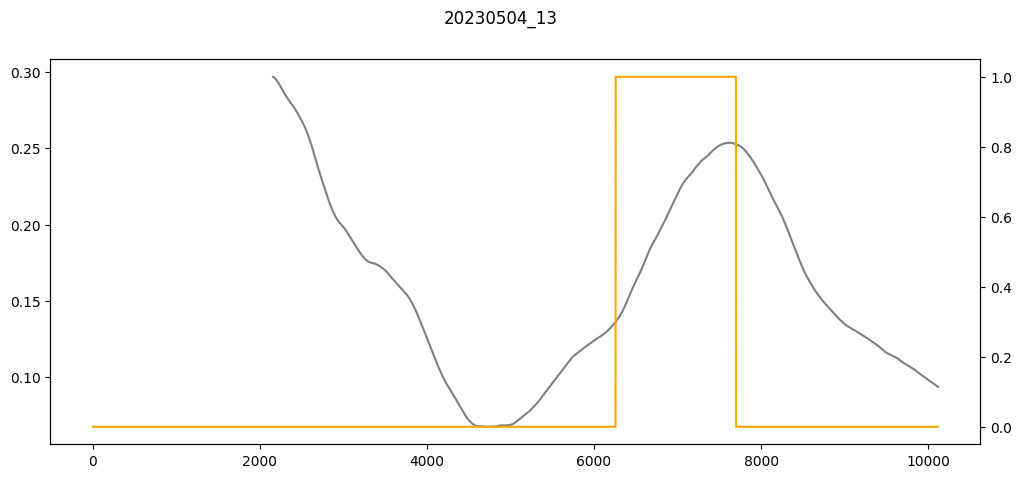

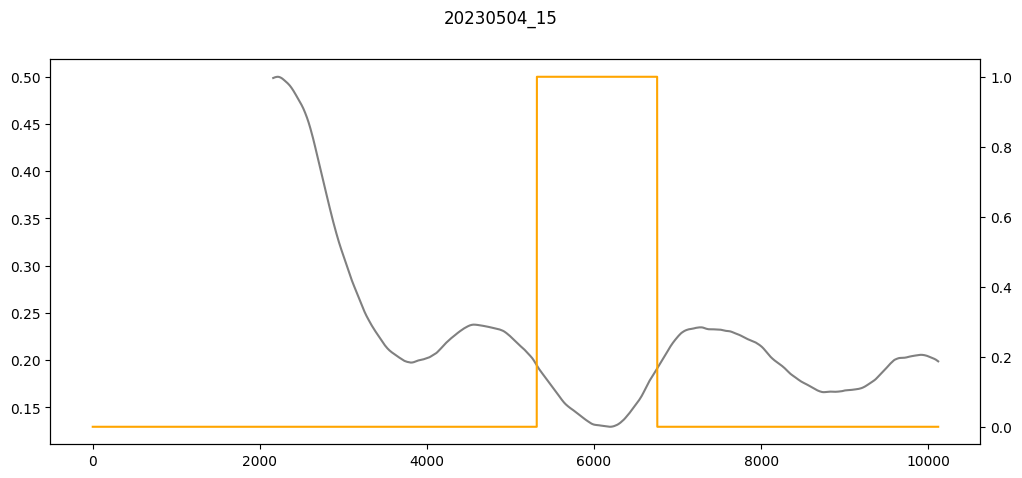

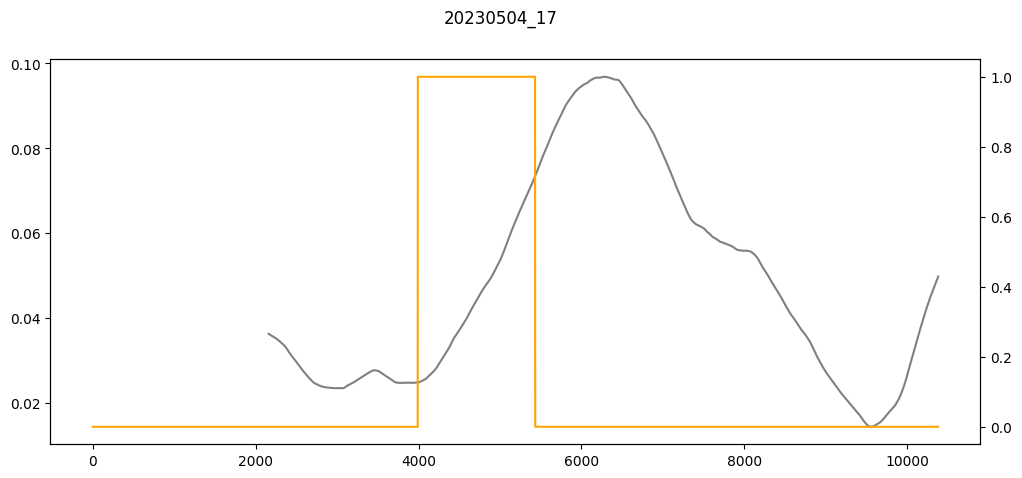

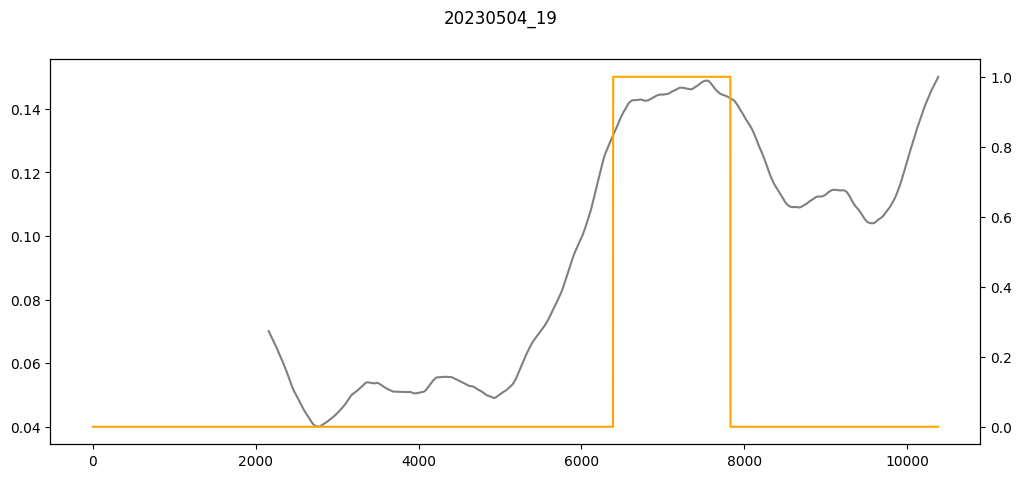

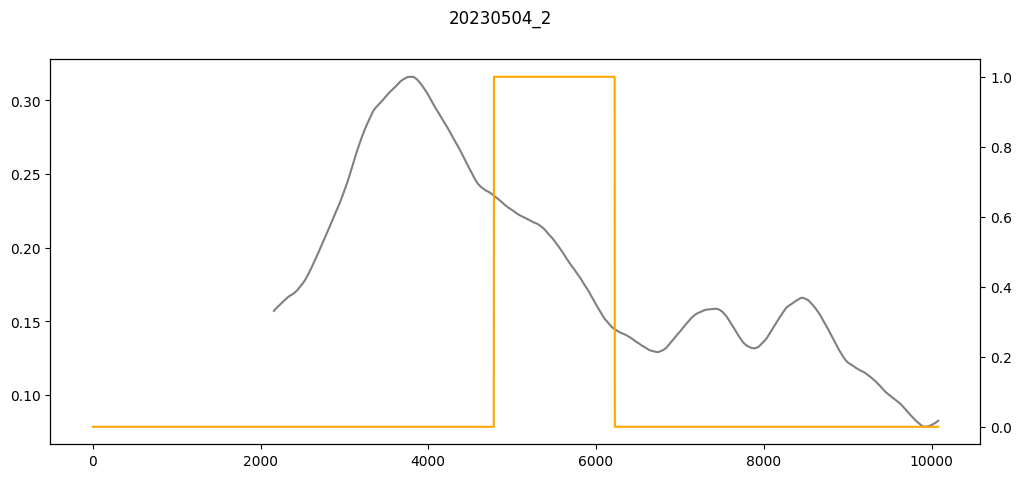

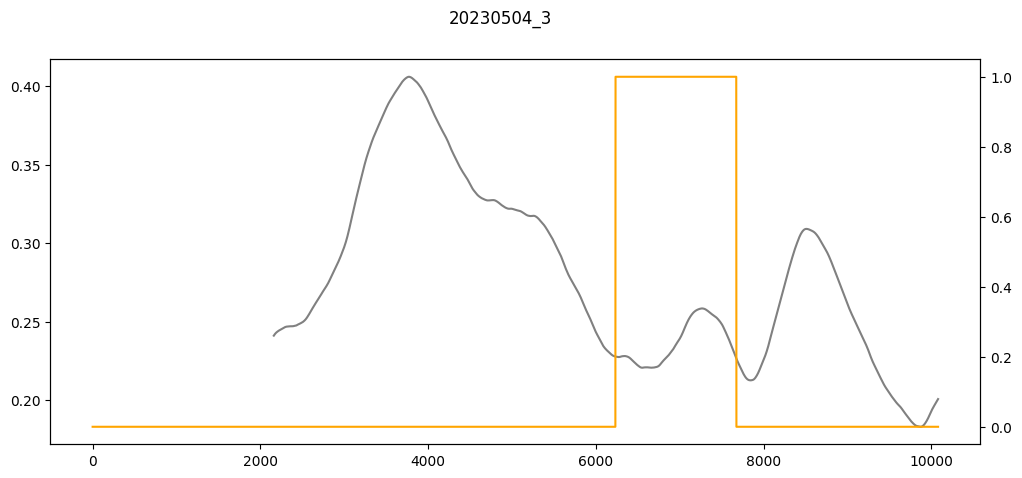

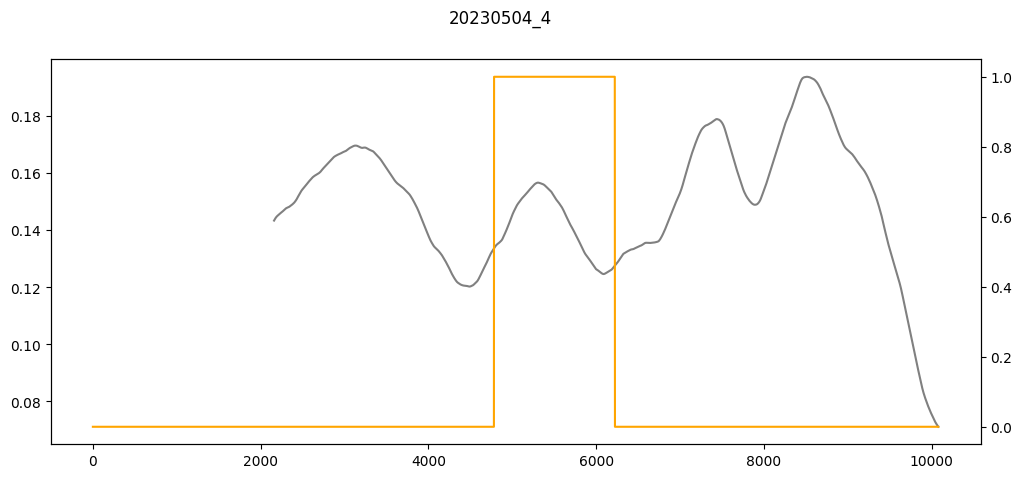

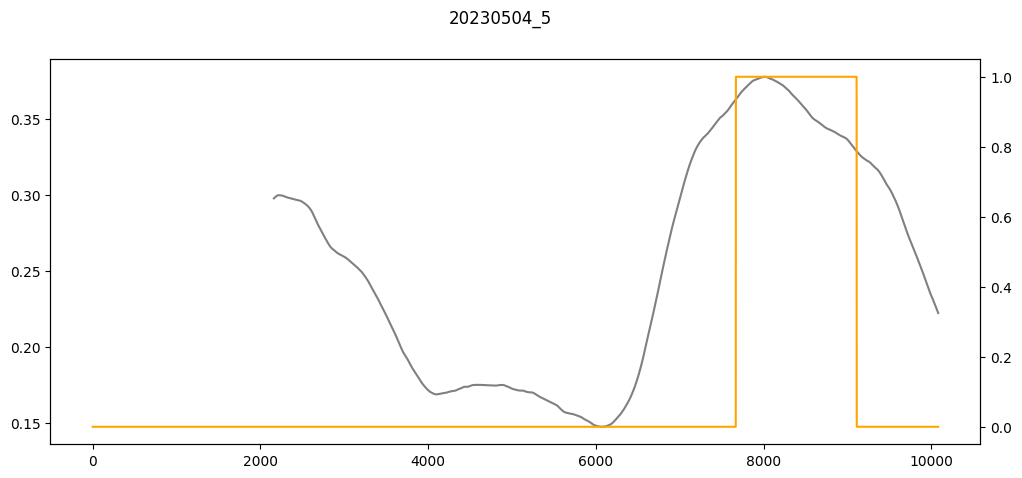

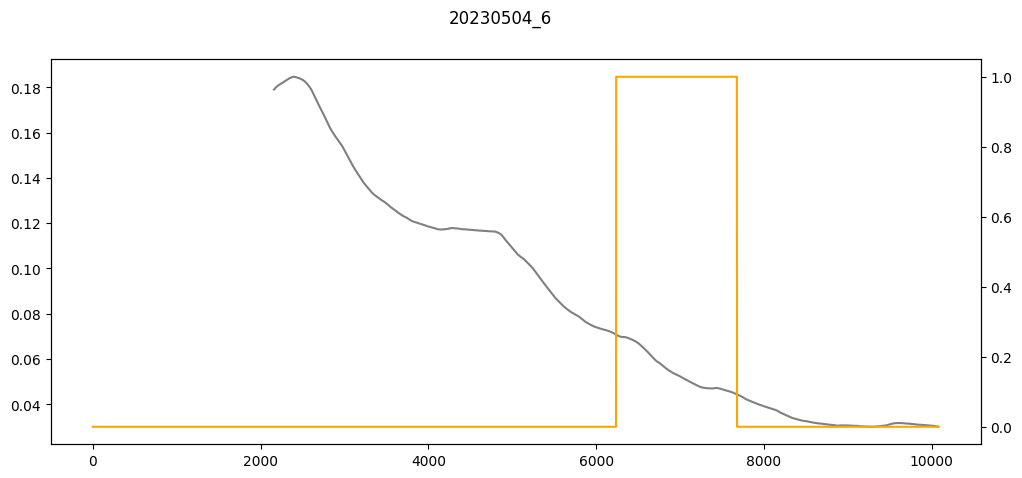

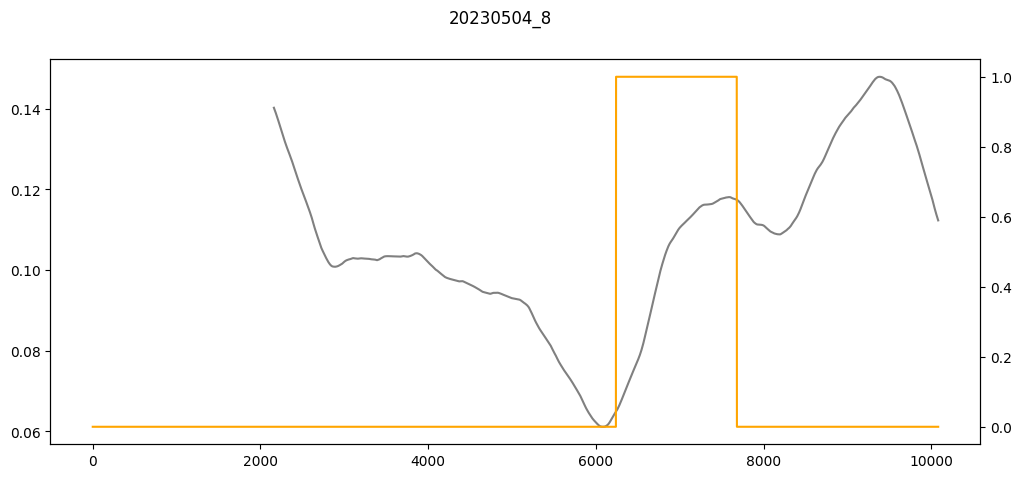

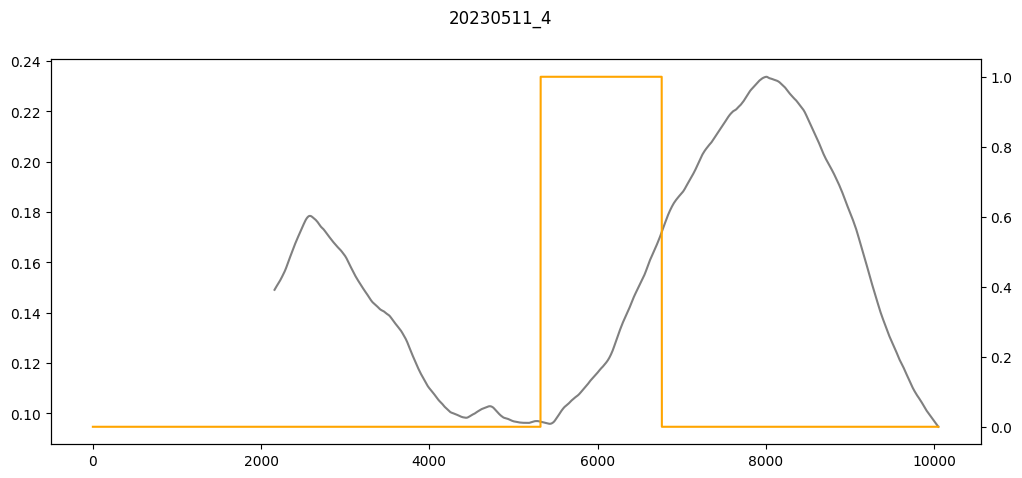

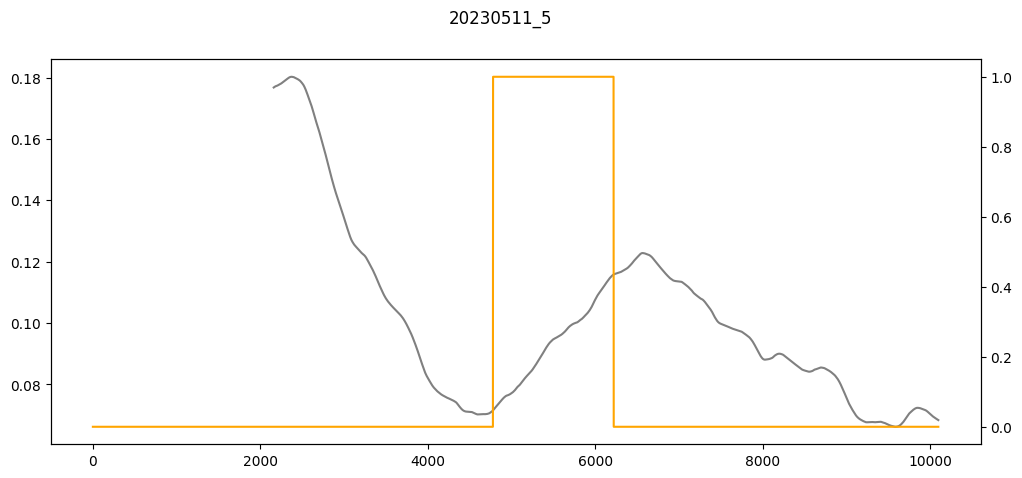

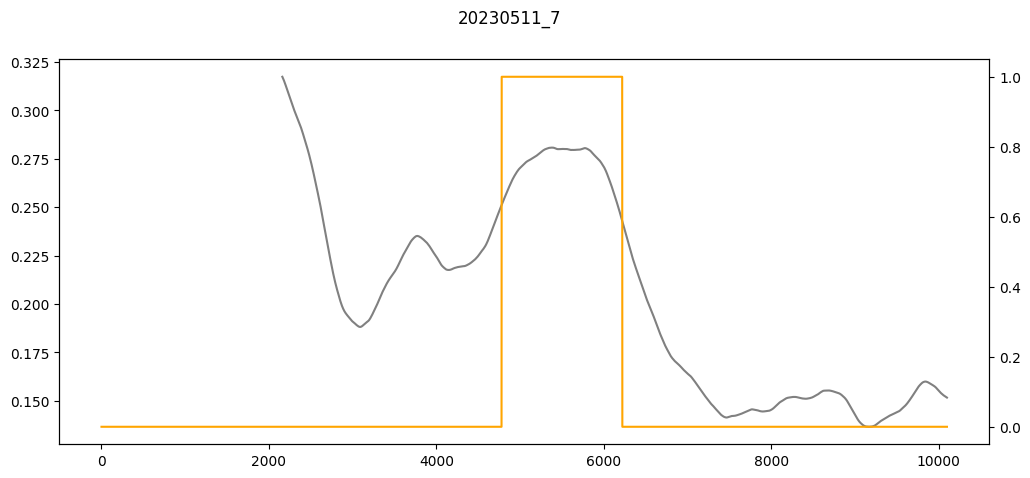

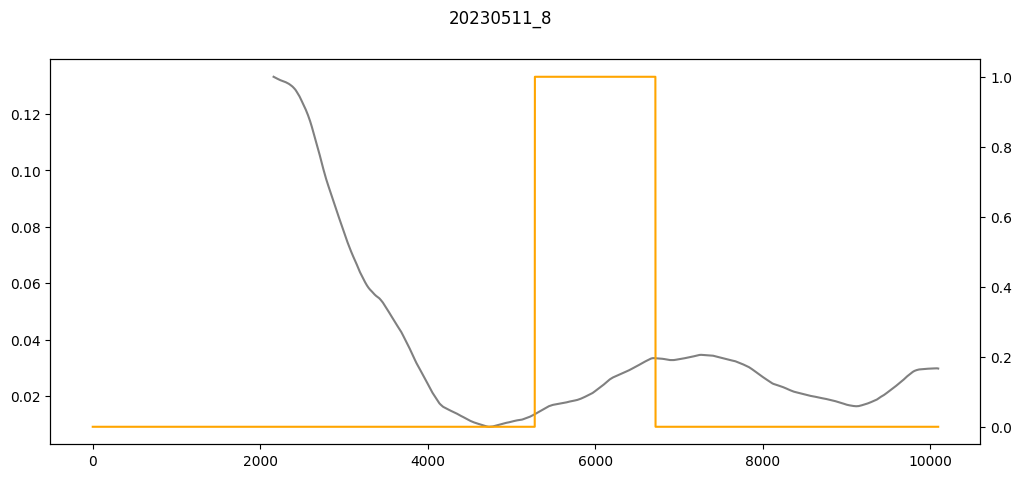

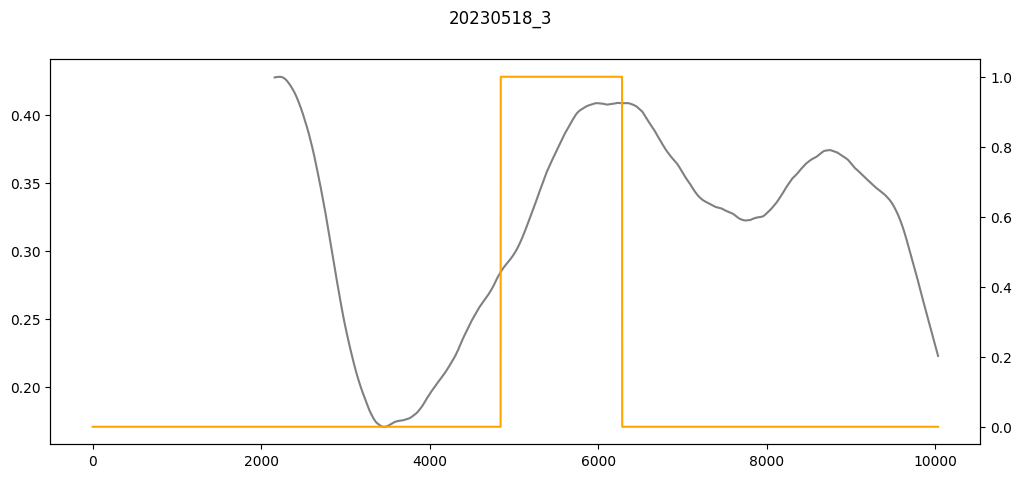

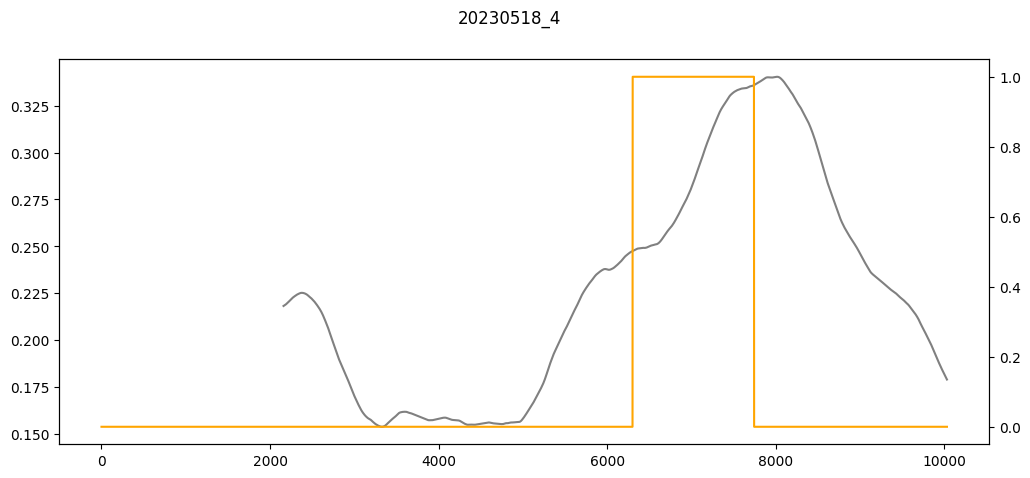

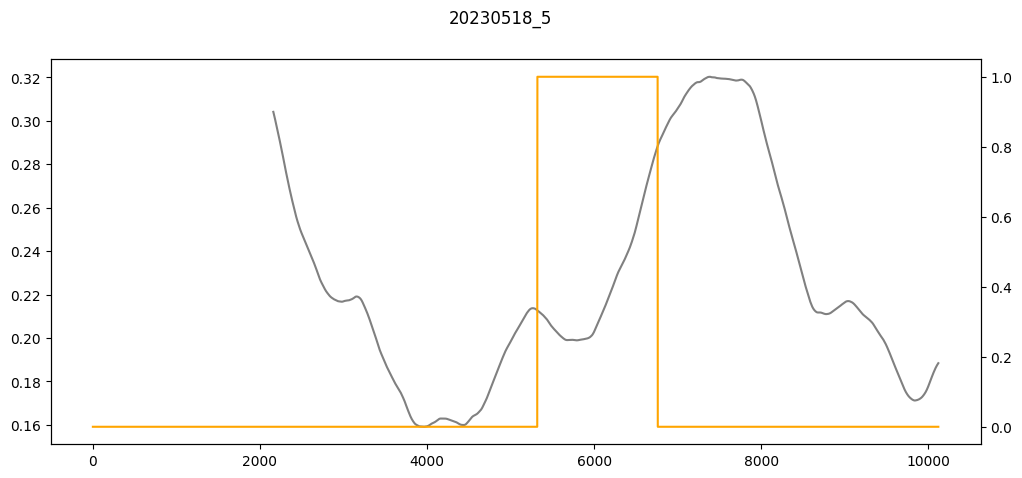

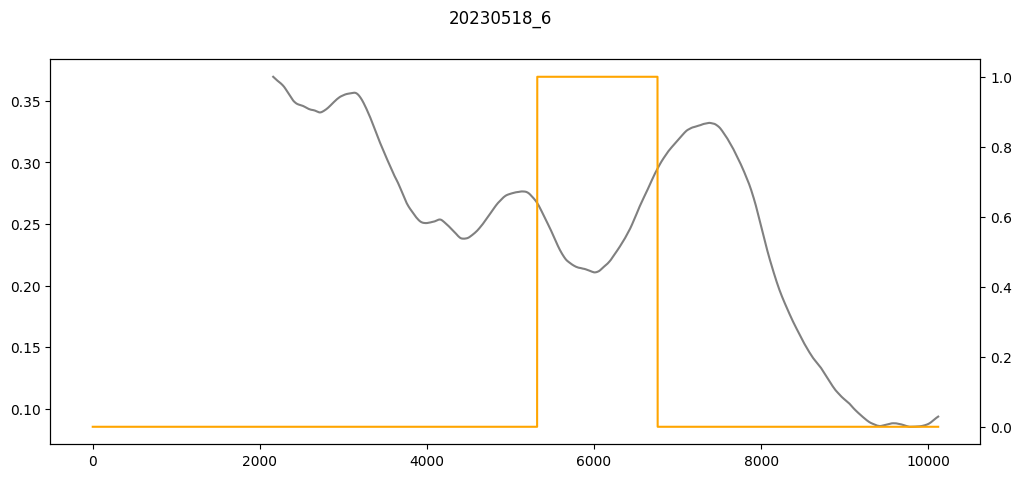

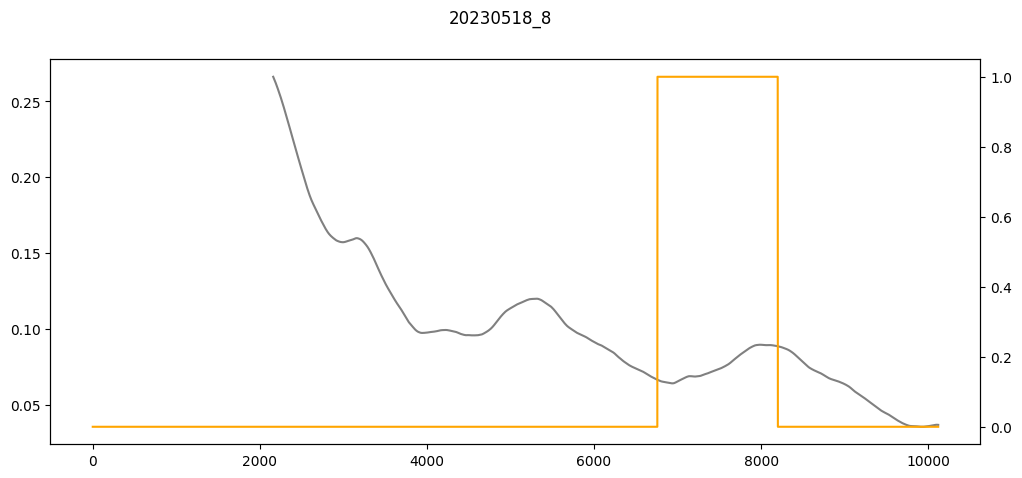

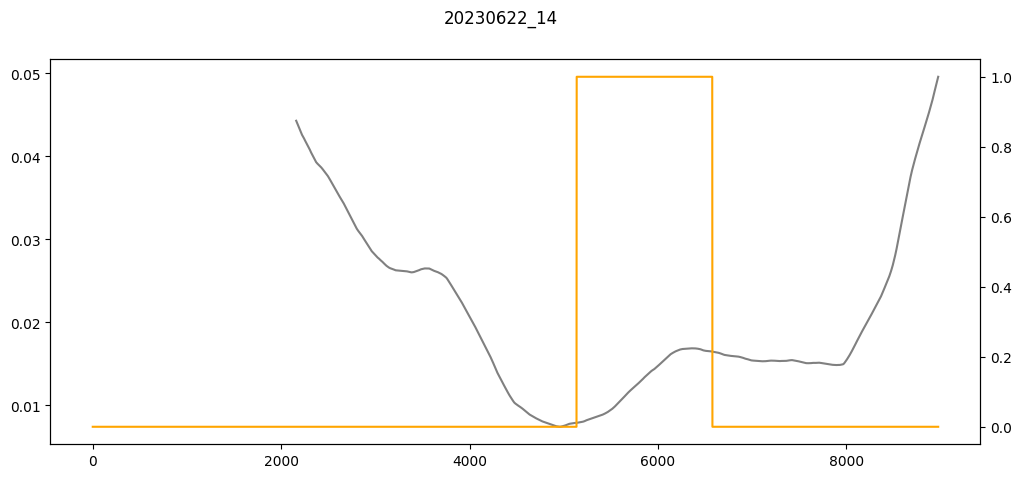

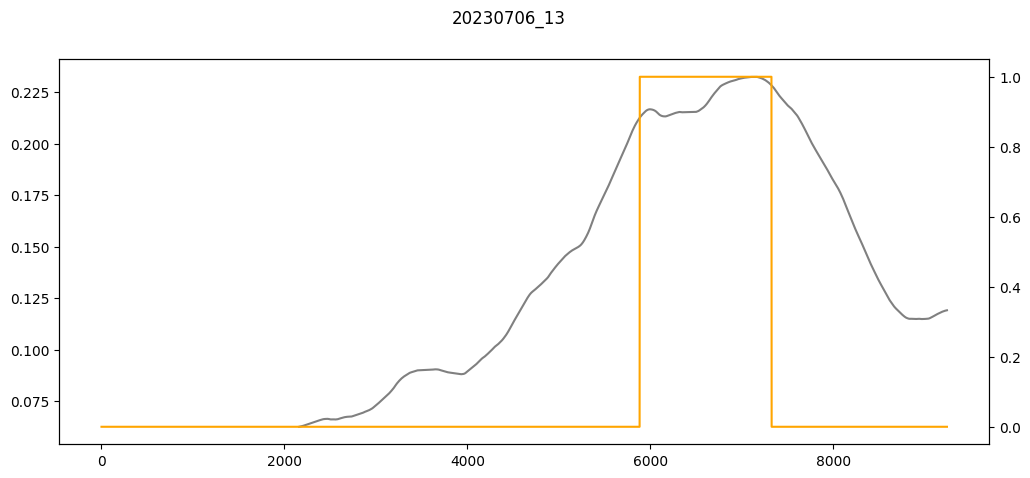

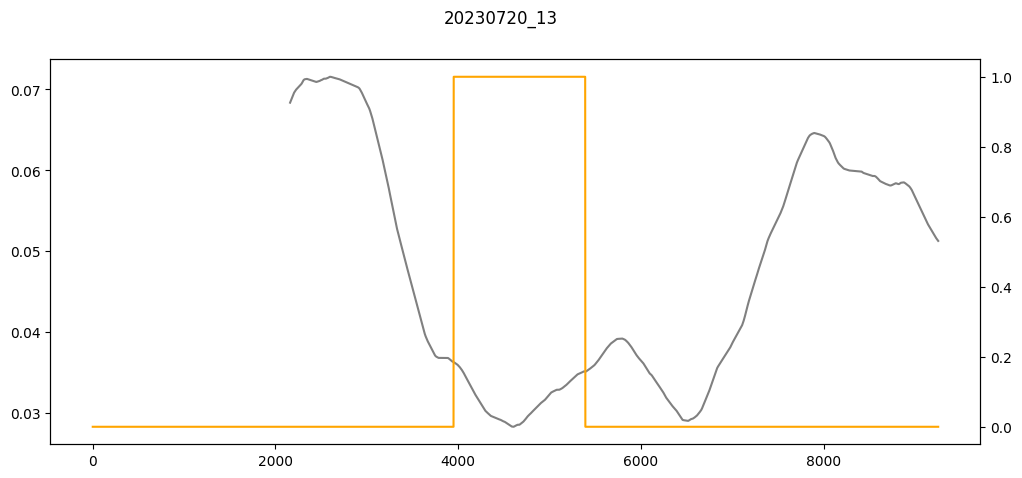

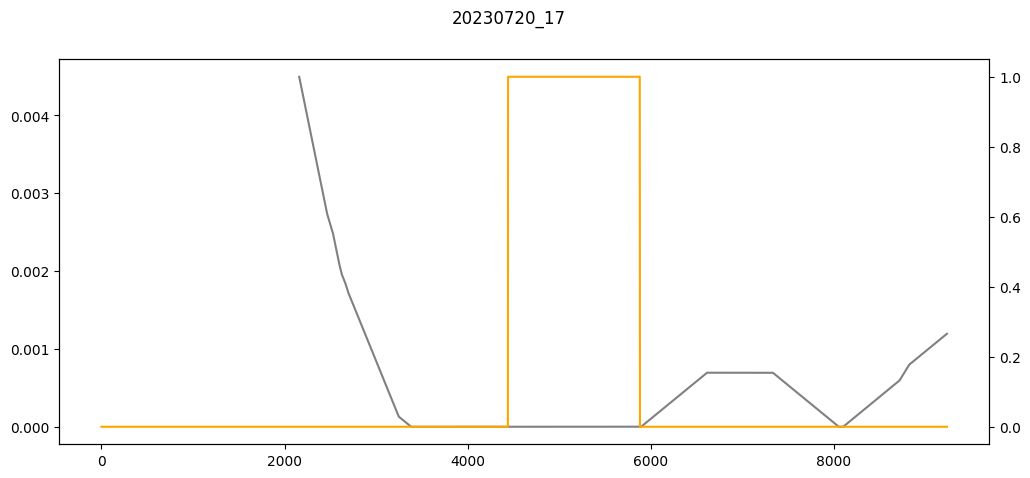

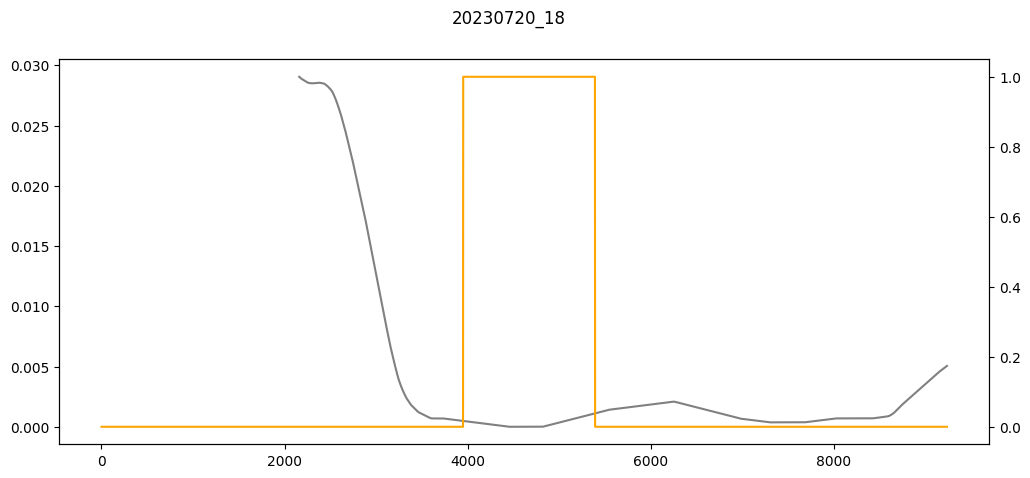

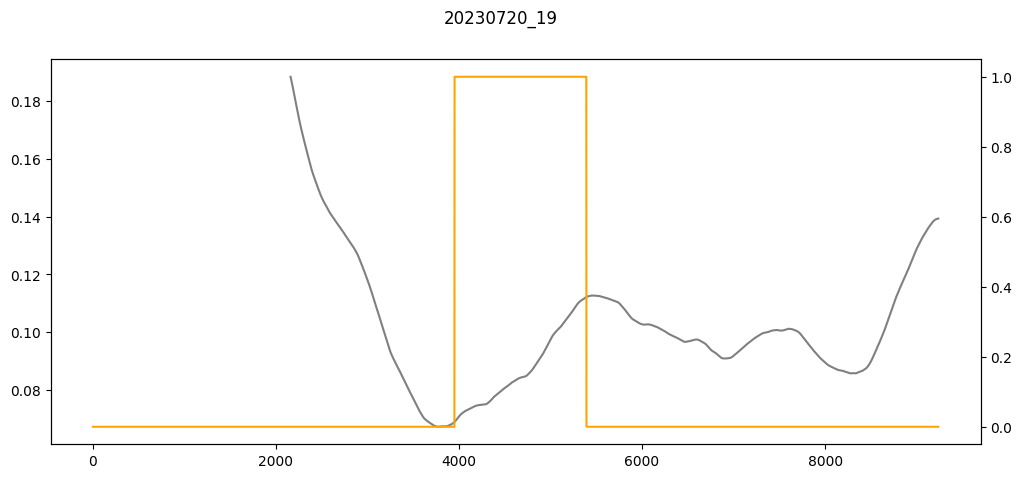

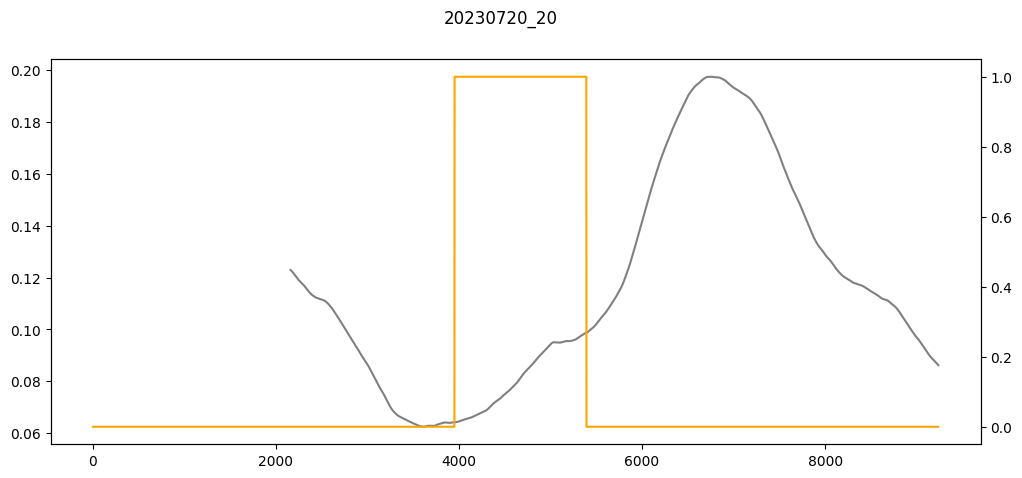

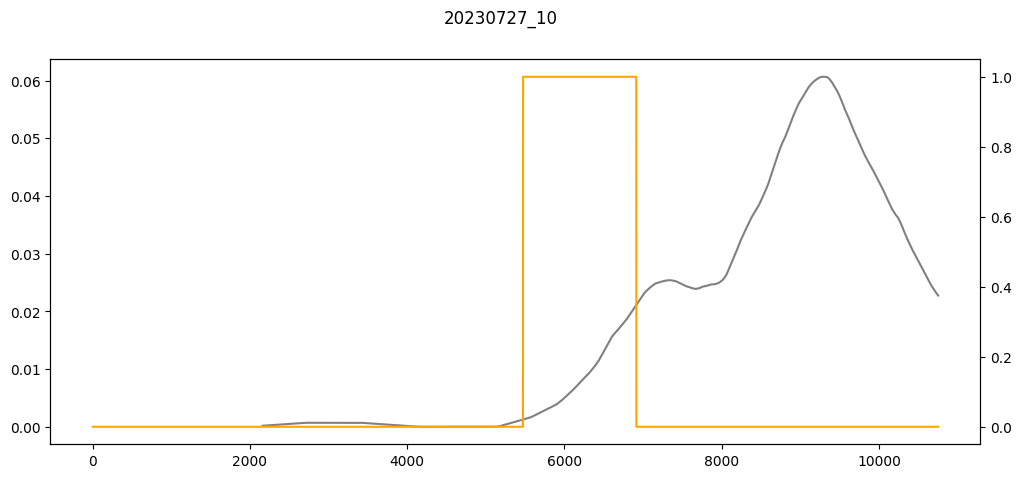

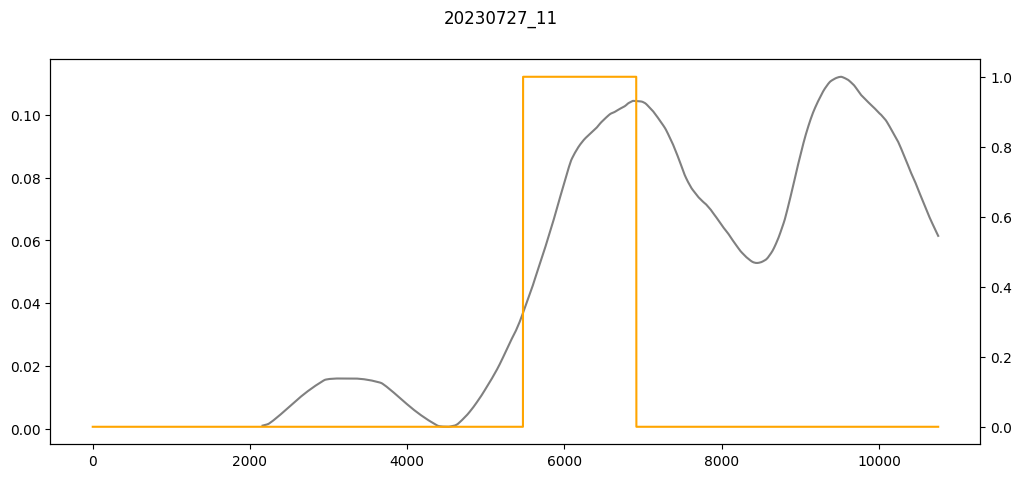

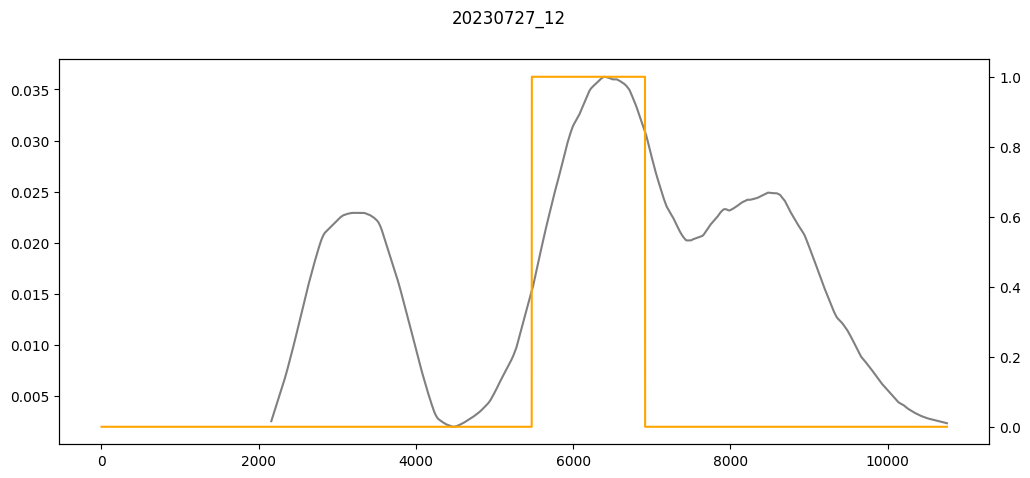

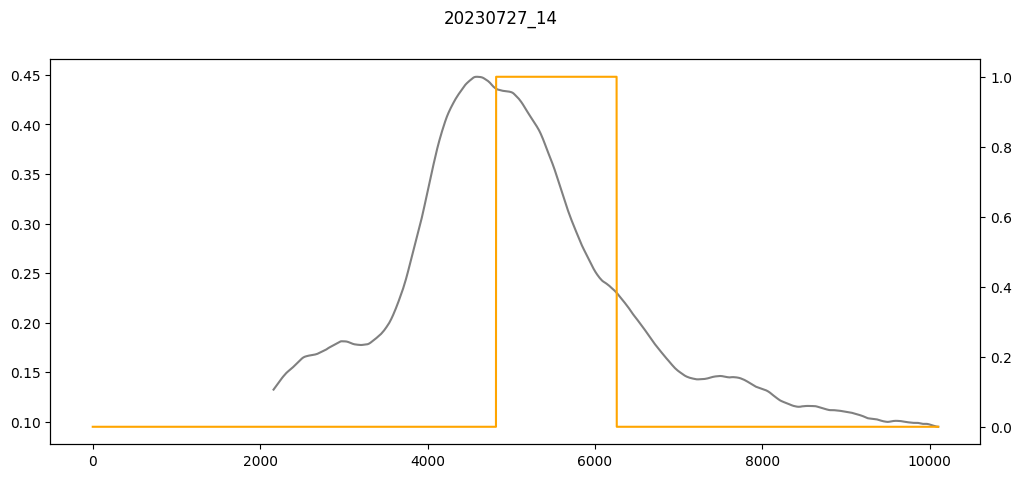

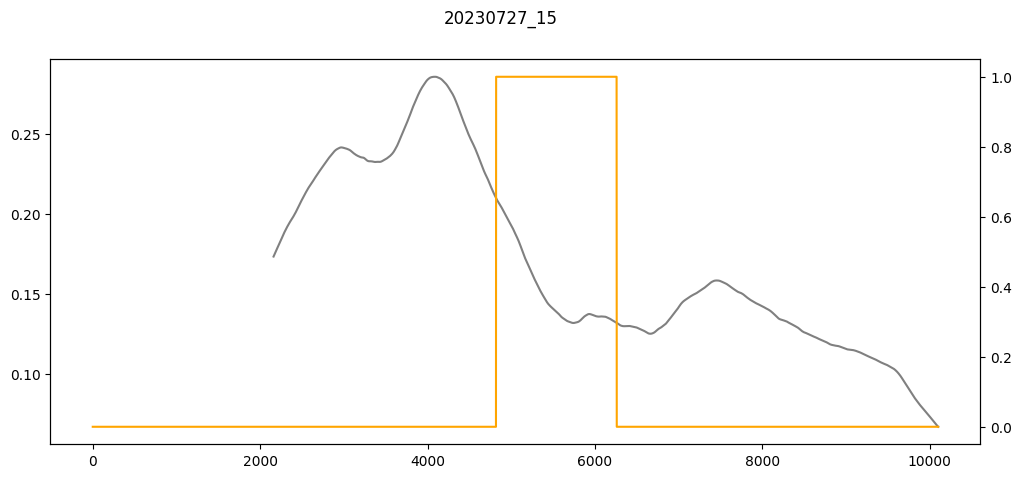

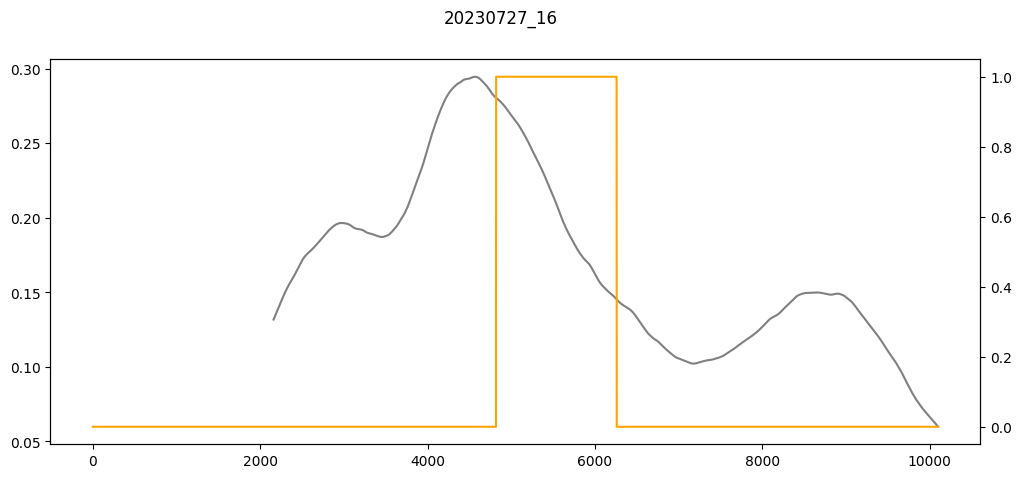

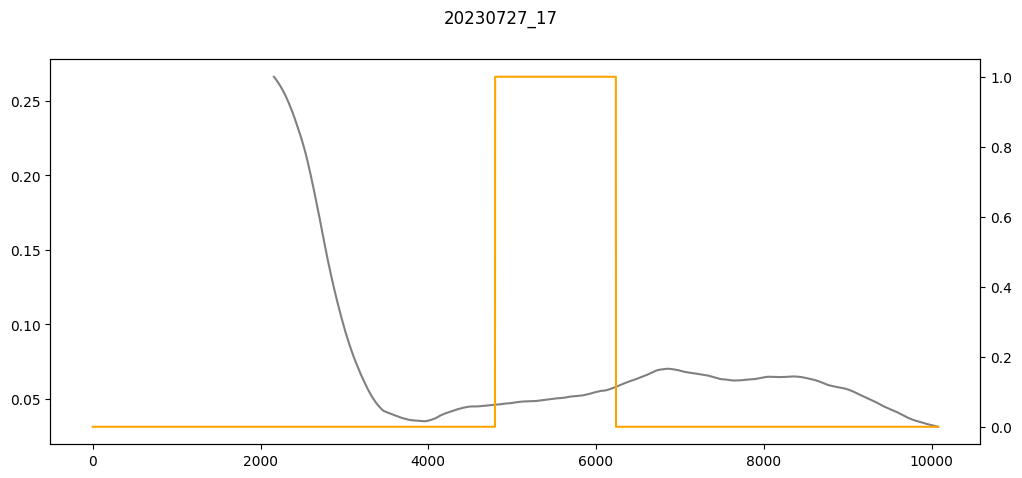

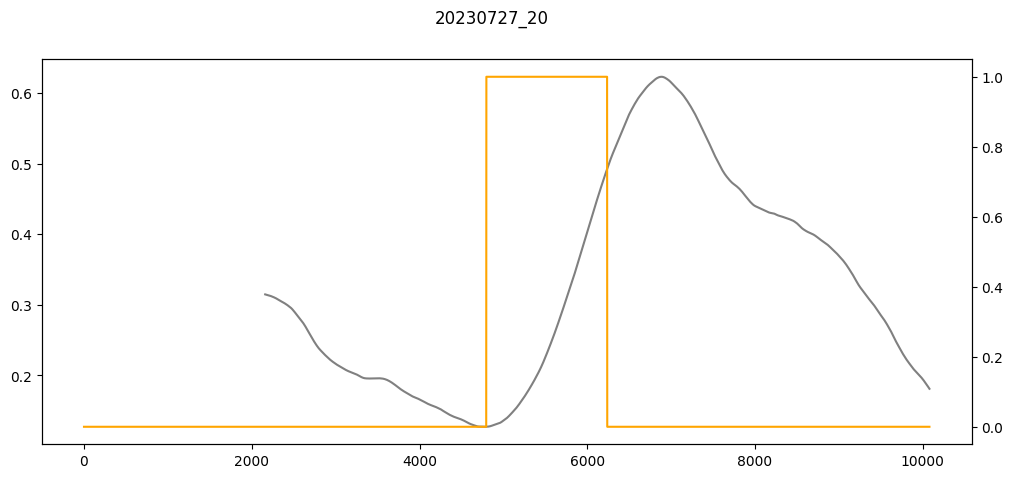

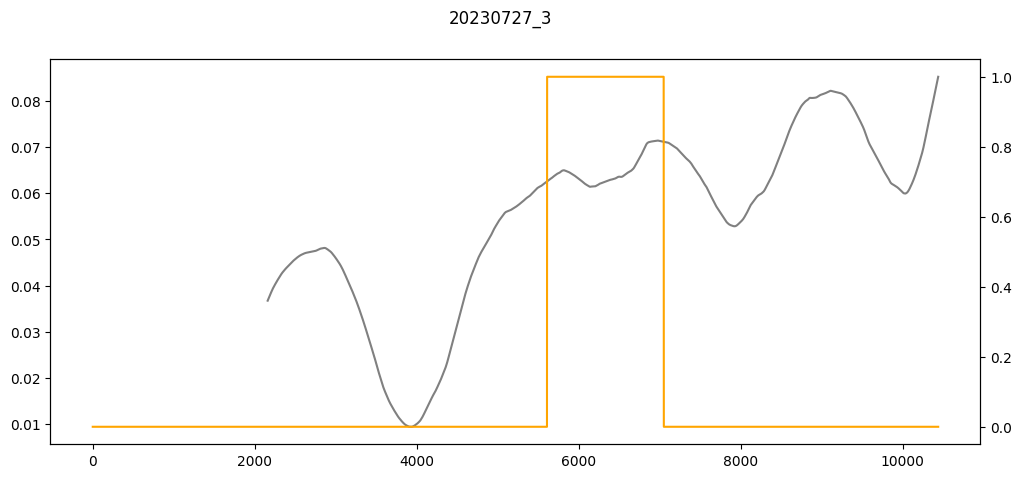

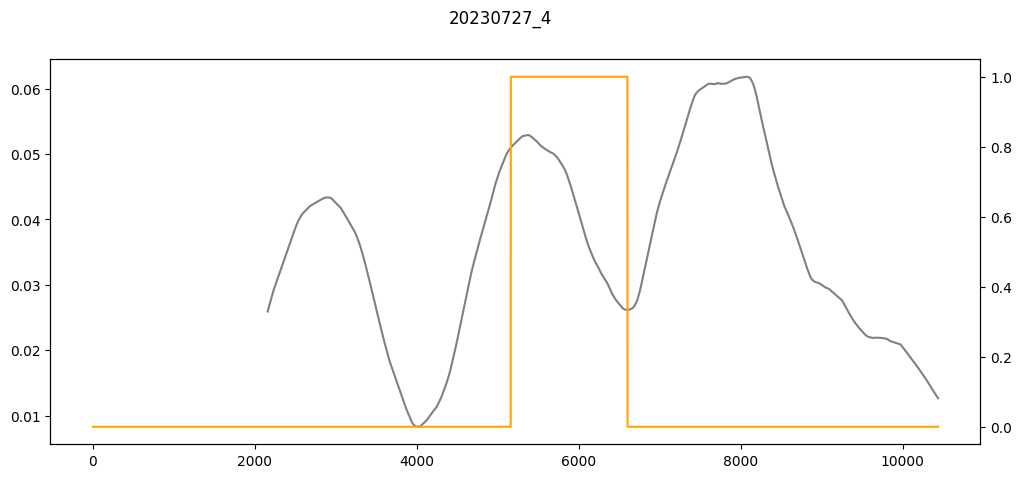

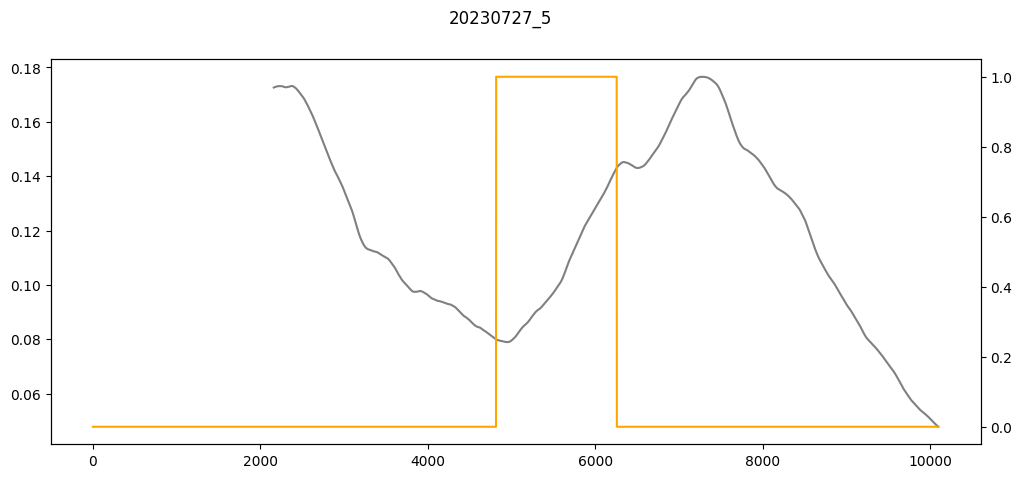

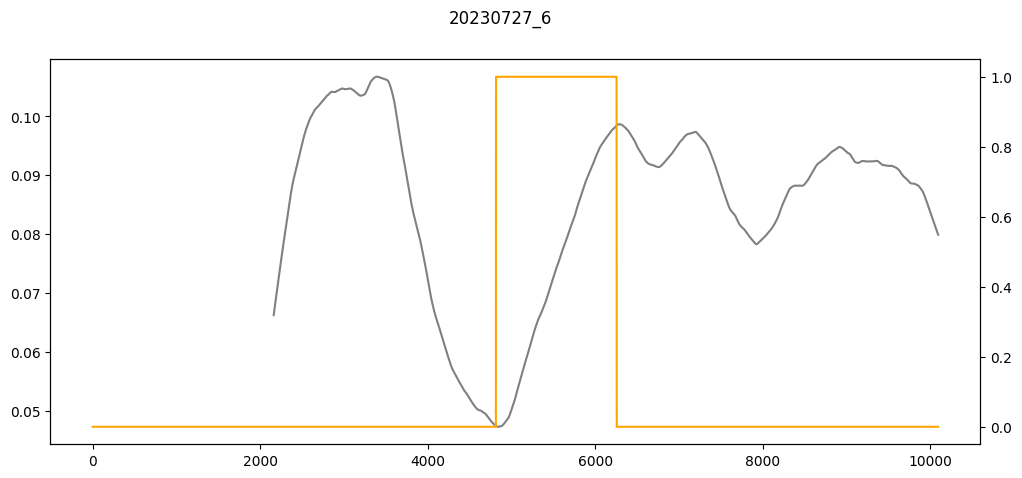

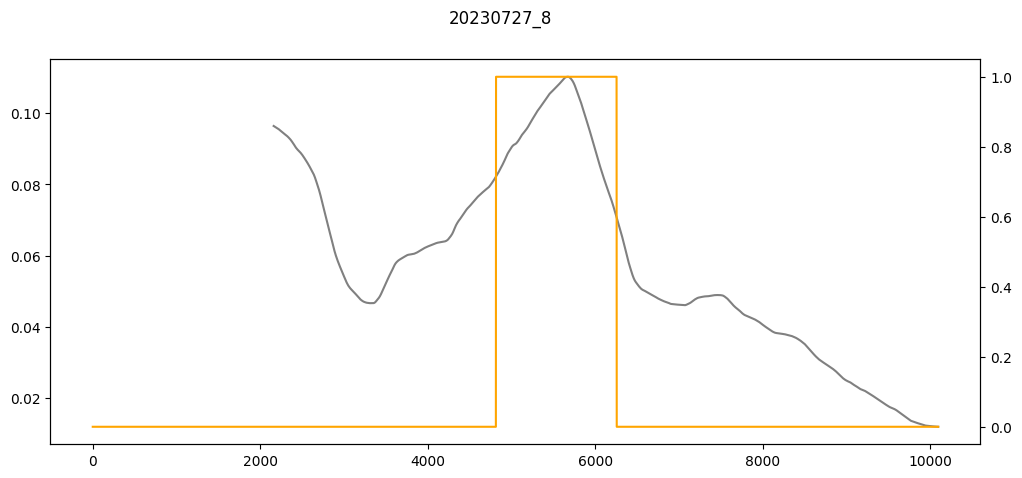

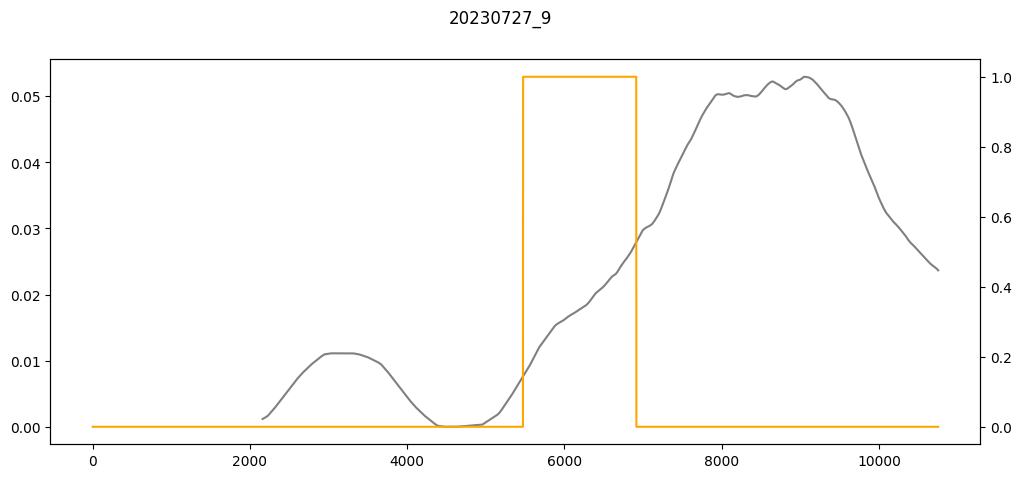

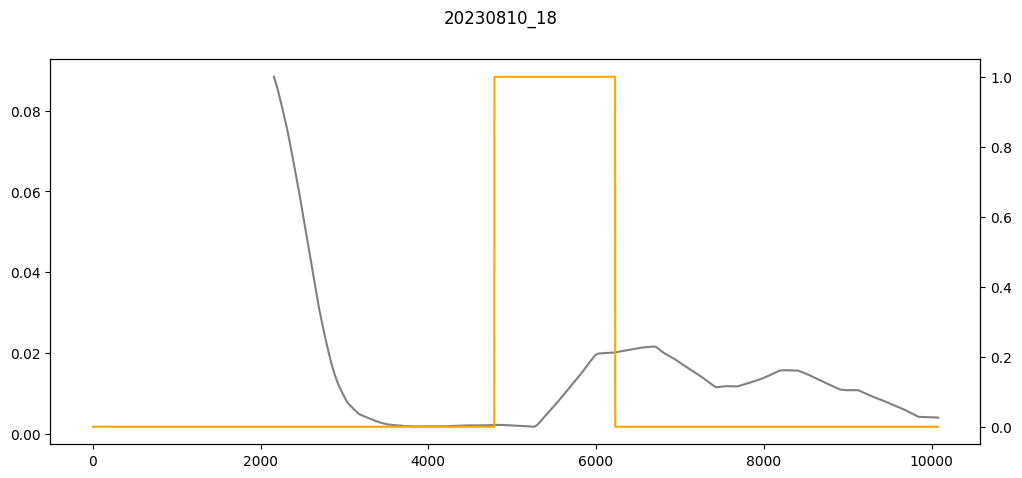

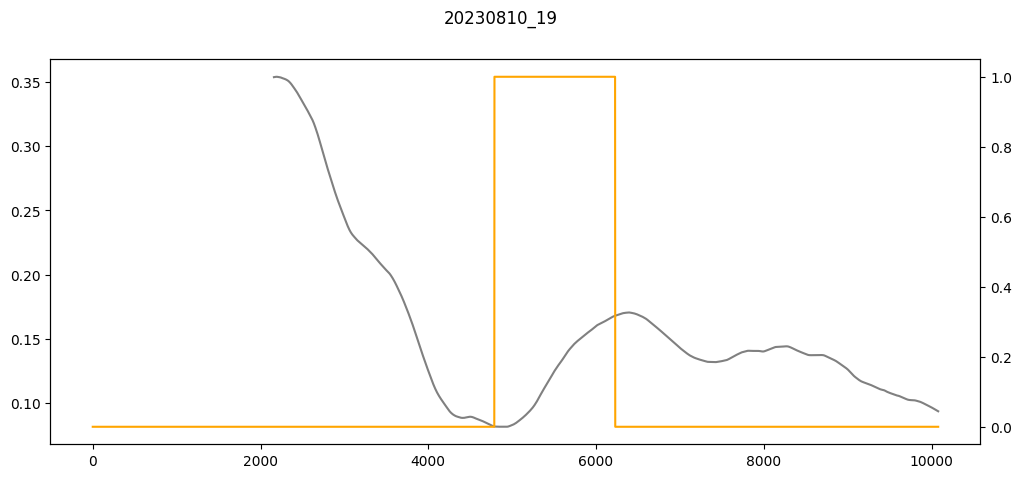

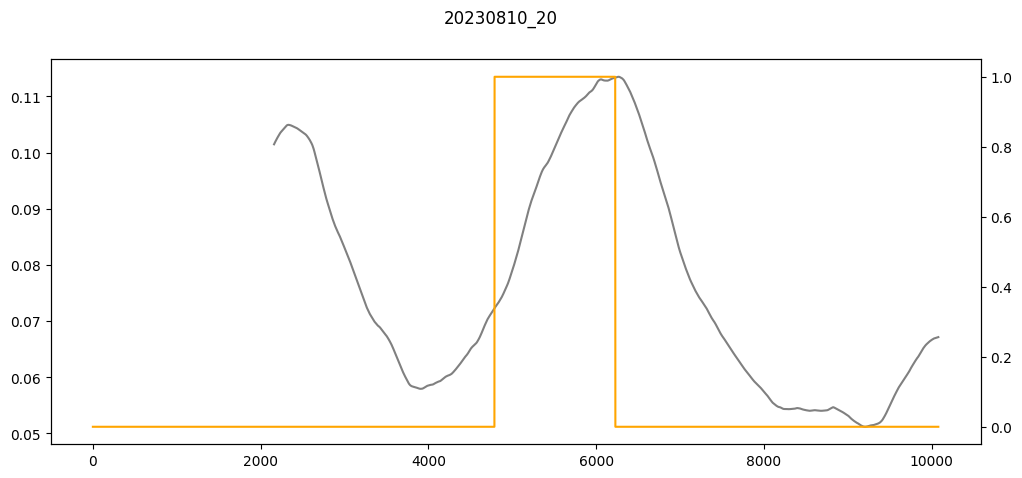

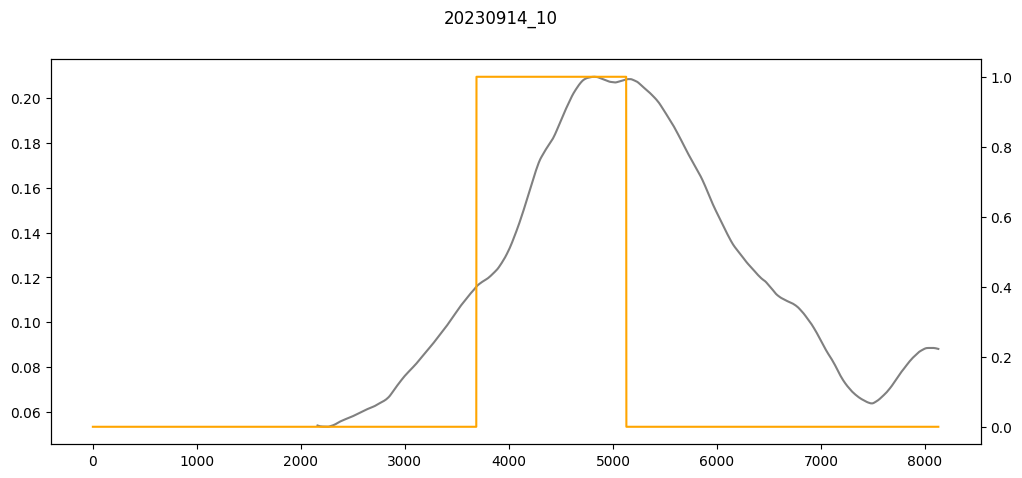

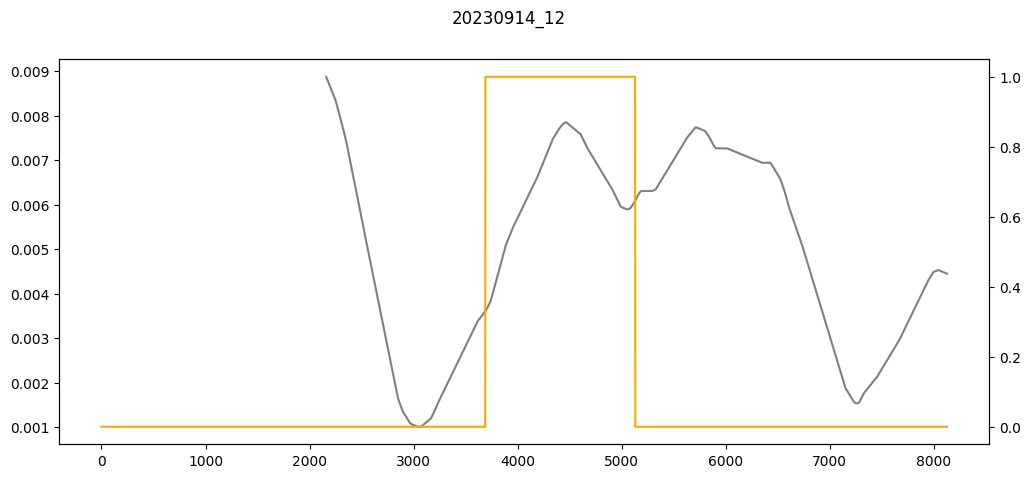

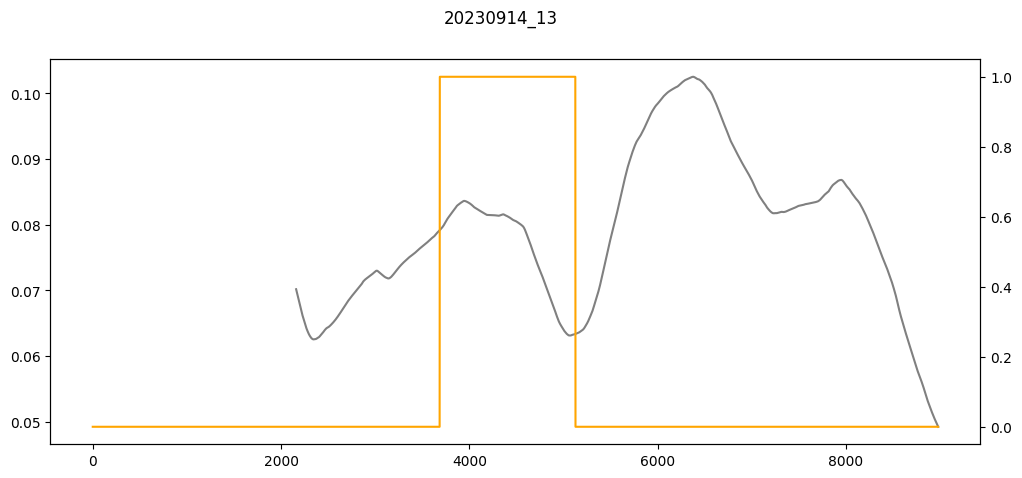

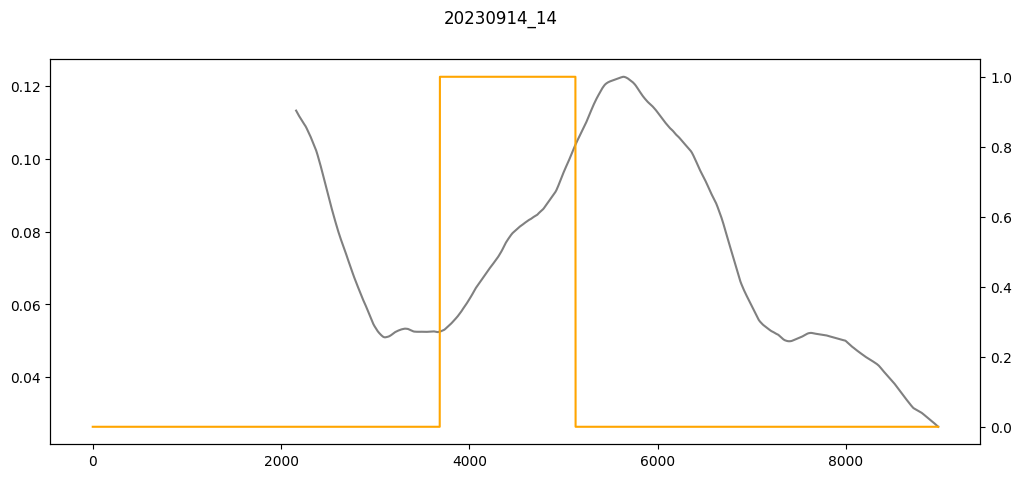

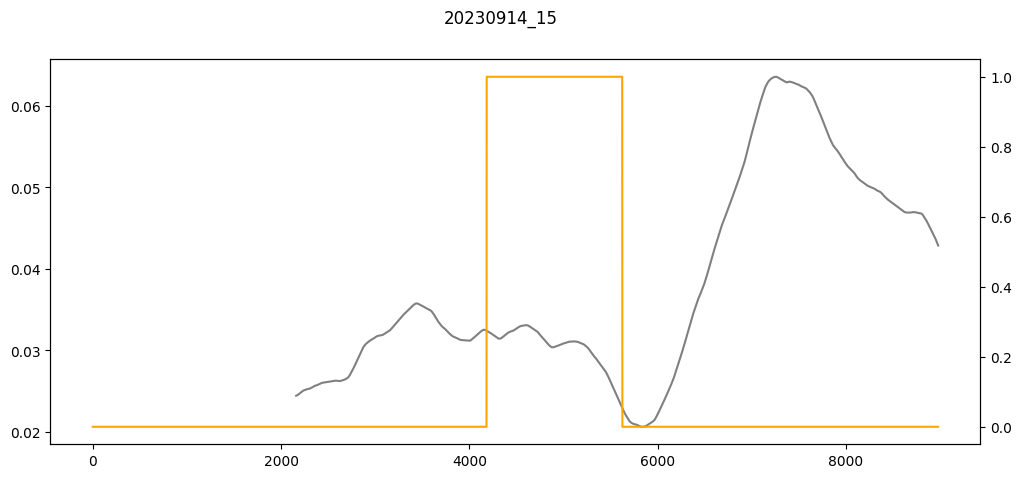

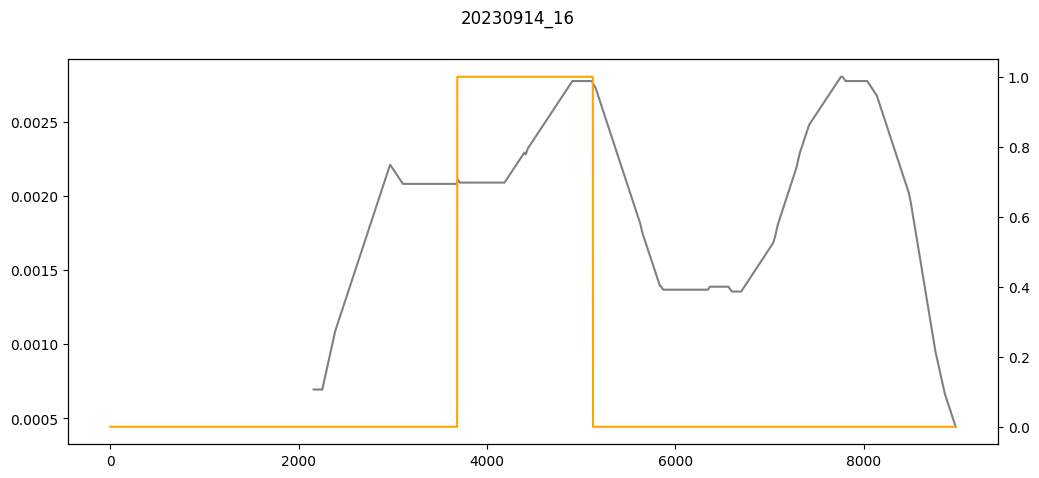

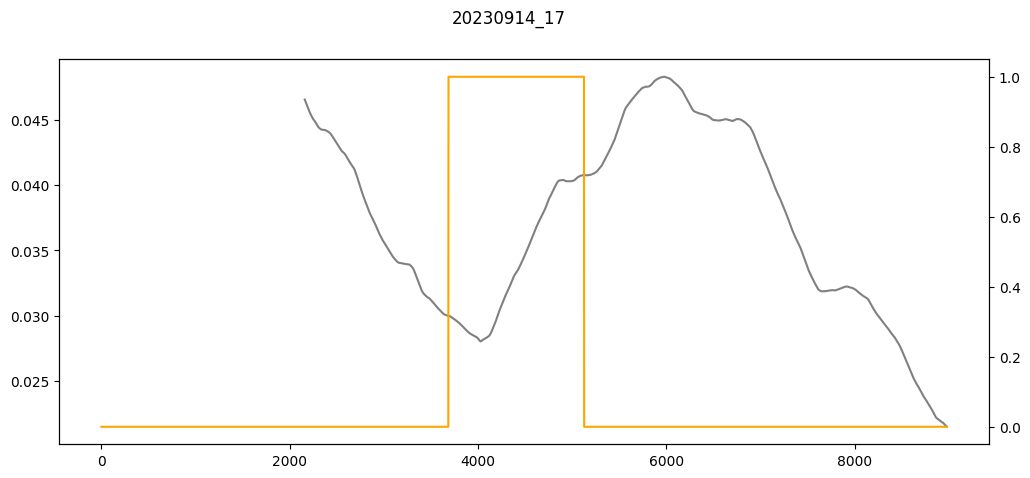

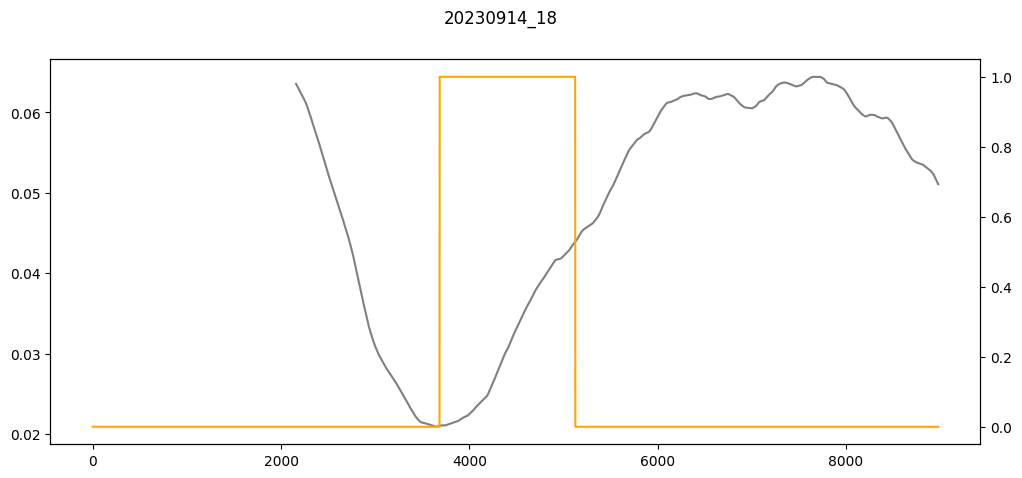

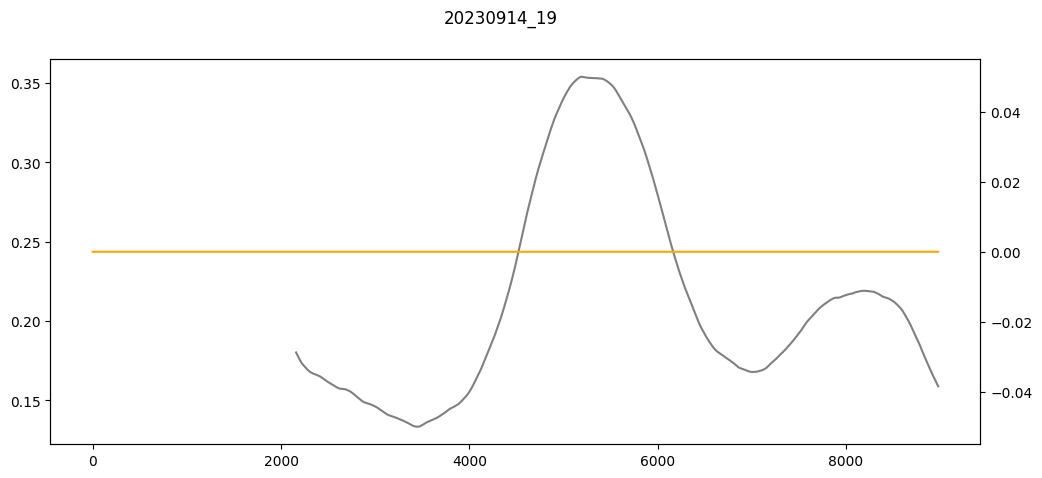

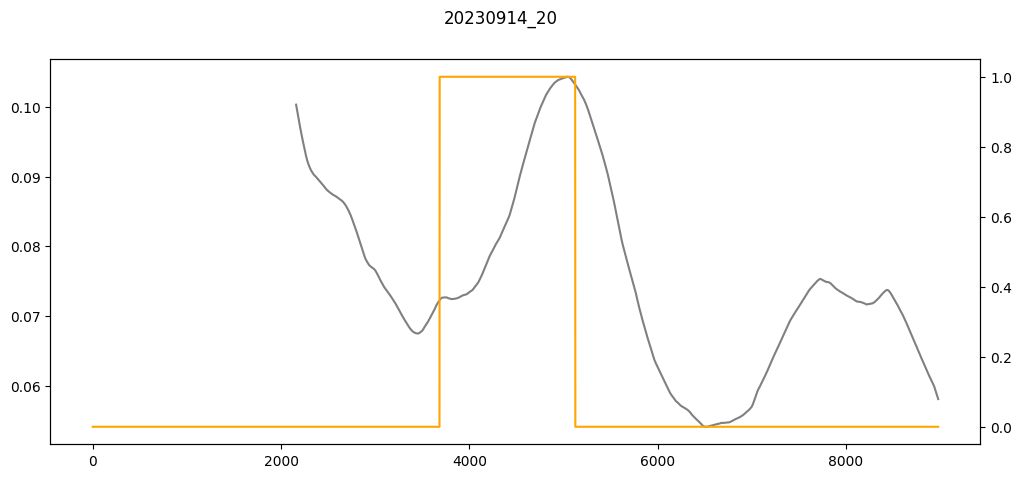

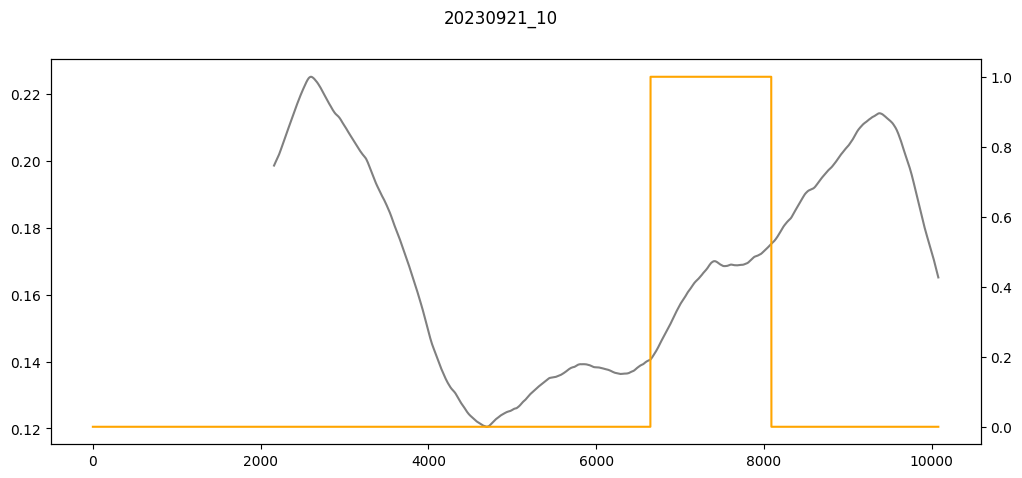

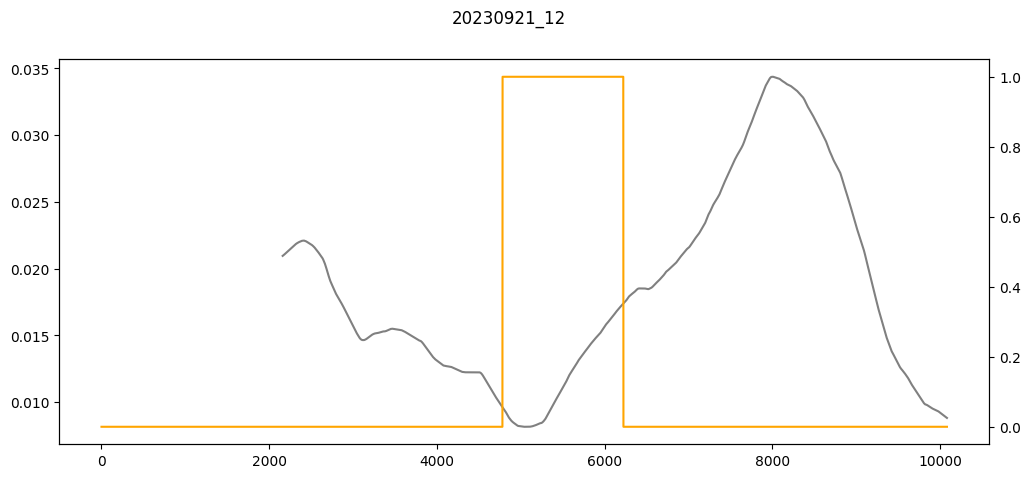

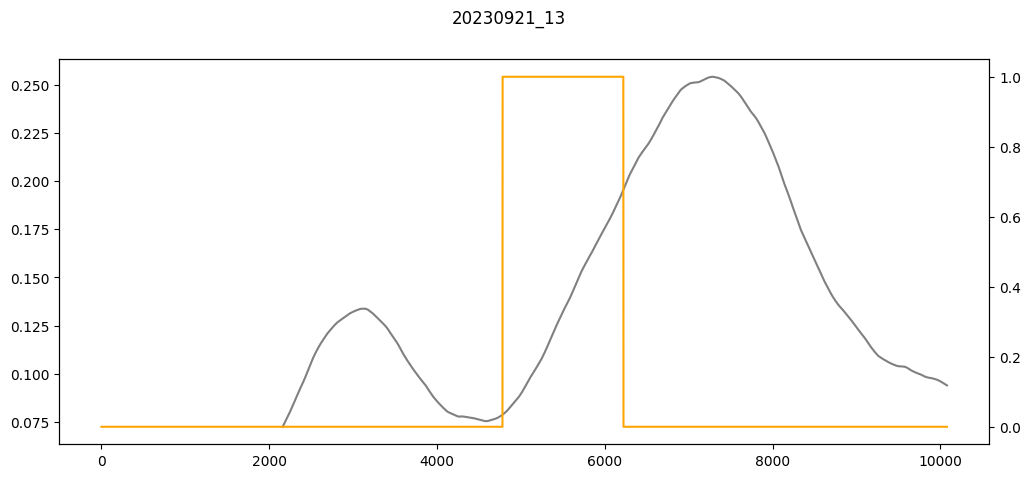

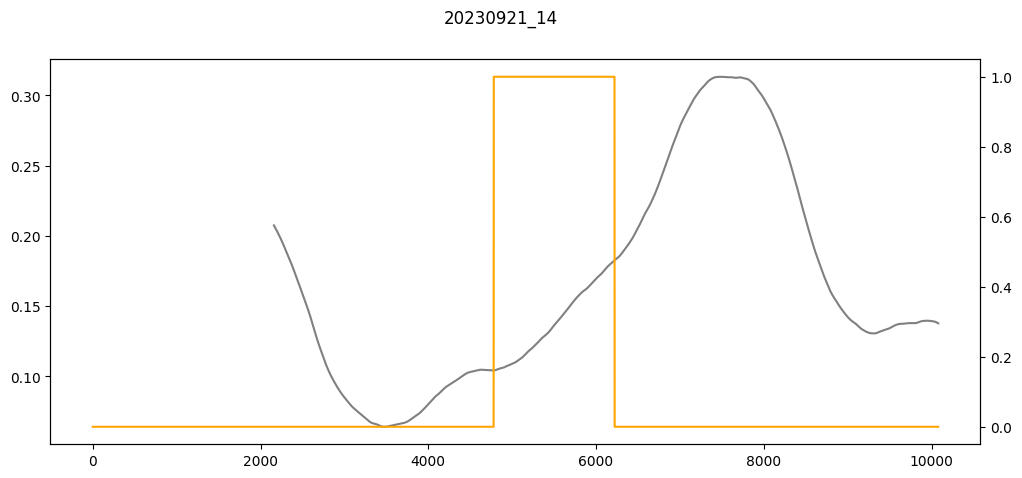

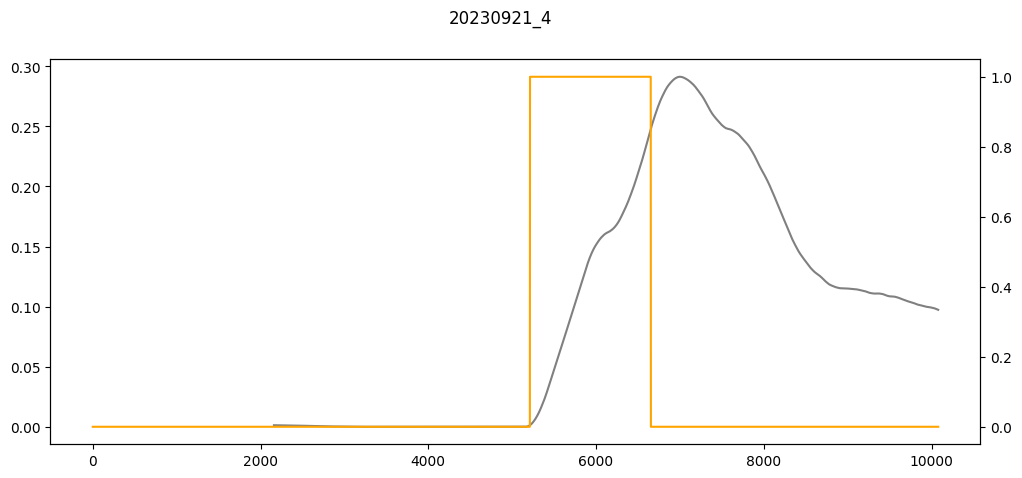

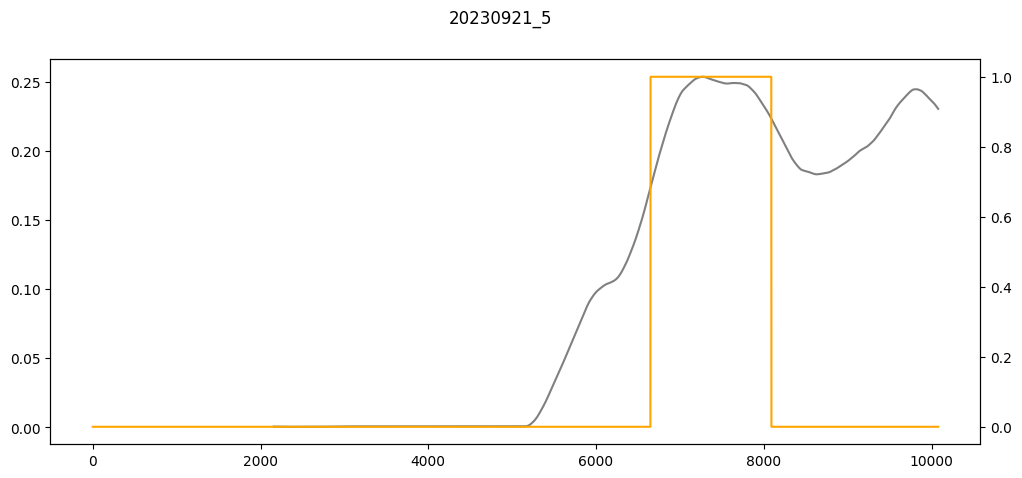

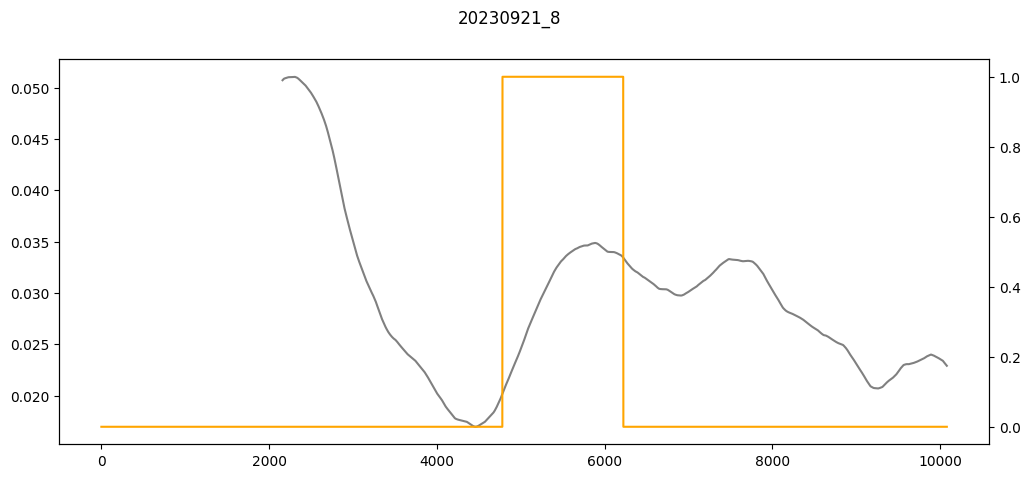

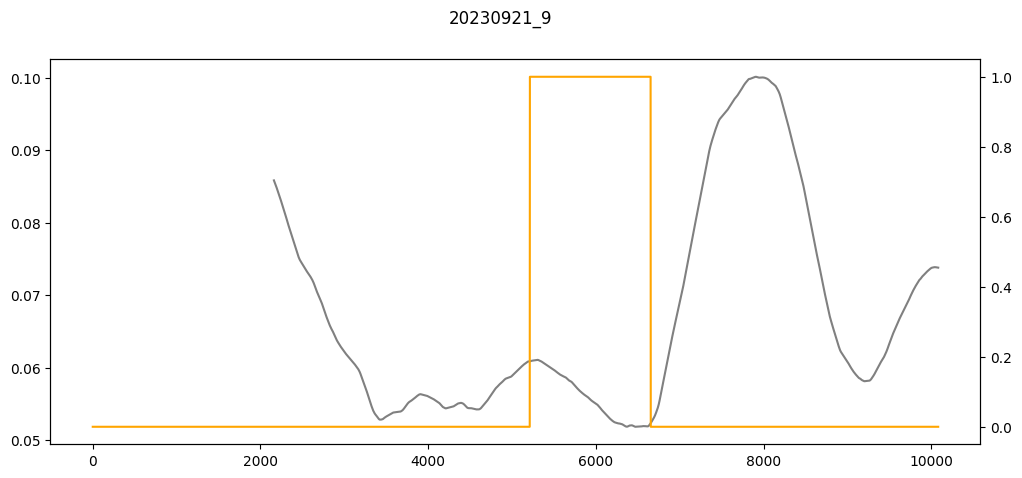

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import os

dir = 'train_gt_n'
path = f'/home/com_2/workspace/pig_dataset/{dir}/'
file_list = os.listdir(path)
file_list = sorted(file_list)

# CSV 파일 경로
for j in file_list:
    csv_file = path + j

    # CSV 파일 읽기
    df = pd.read_csv(csv_file)

    # 시간 순서로 데이터 정렬
    df['Date_time'] = pd.to_datetime(df['Date_time'])  # timestamp 열을 datetime 형식으로 변환
    df.sort_values(by='Date_time', inplace=True)  # timestamp 열을 기준으로 정렬
    df.reset_index(drop=True, inplace=True) 

    name = j[:-4]


    fig = plt.figure(figsize=(12,5))
    window_size = 1440
    moving_average = []
    for i in range(len(df['ear_state'])-window_size):
        moving_average.append(sum(df['ear_state'][i:i+window_size])/window_size)


    fig.suptitle(name)
    window_size_2 = 720
    db_moving_average = []
    for i in range(len(moving_average)-window_size_2):
            db_moving_average.append((sum(moving_average[i:i+window_size_2]))/window_size_2)

    ax1 = fig.add_subplot()
    ax1.plot(df.index[window_size+window_size_2:], db_moving_average, color='gray')
    
    ax2 = ax1.twinx()
    ax2.plot(df['label'], color='orange')
    
    
    plt.show()

In [3]:
name = csv_file.split('/')[-1][:-4]
name

'predict_bbox_2'

In [3]:
df

,Date_time,id_0,id_1,id_2,id_3
0,2023-09-14 18:20:00,1,1,1,1
1,2023-09-14 18:21:00,1,1,1,0
2,2023-09-14 18:22:00,1,1,0,1
3,2023-09-14 18:23:00,1,1,0,1
4,2023-09-14 18:24:00,1,0,0,1
...,...,...,...,...,...
8976,2023-09-20 23:56:00,0,0,0,0
8977,2023-09-20 23:57:00,0,0,0,0
8978,2023-09-20 23:58:00,0,0,0,0
8979,2023-09-20 23:59:00,0,0,0,0


In [4]:
df['Date_time'].is_unique

True

In [89]:
df = df.loc[~df['Date_time'].duplicated(keep='last')]

In [14]:
df.loc[df['Date_time'] == '2023-05-15 16:13:00']

,Date_time,id_0,id_1,id_2,id_3


In [5]:
df.loc[df['Date_time'] == '2023-05-15 07:52:00']

,Date_time,id_0,id_1,id_2,id_3
6219,2023-05-15 07:52:00,0,0,0,0


In [32]:
df.loc[df['Date_time'] == '2023-05-07 07:45:00']

,Date_time,id_0,id_1,id_2,id_3
4804,2023-05-07 07:45:00,0,0,0,0


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
# csv_file = '/home/com_2/workspace/yjshin/capstone/timeseries_dataset/20230727_cam4.csv'
csv_file = '/home/com_2/workspace/yjshin/capstone/timeseries_dataset/220.csv'

# CSV 파일 읽기
df = pd.read_csv(csv_file)

# 시간 순서로 데이터 정렬
df['Date_time'] = pd.to_datetime(df['Date_time'])  # timestamp 열을 datetime 형식으로 변환
df.sort_values(by='Date_time', inplace=True)  # timestamp 열을 기준으로 정렬
df.reset_index(drop=True, inplace=True) 

name = csv_file.split('/')[-1][:-4]
name

'220'

In [33]:
# # 230518~230524 cam4
# id_0 = 8199
# id_1 = 6760
# id_2 = 6760
# id_3 = 6760

# # 230511~230517 cam4
# id_0 = 6720
# id_1 = 6219
# id_2 = 6720
# id_3 = 6219


# 230504~230511 cam1
id_0 = 4804
id_1 = 7827
id_2 = 6375
id_3 = 5430

gt = [id_0, id_1, id_2, id_3]

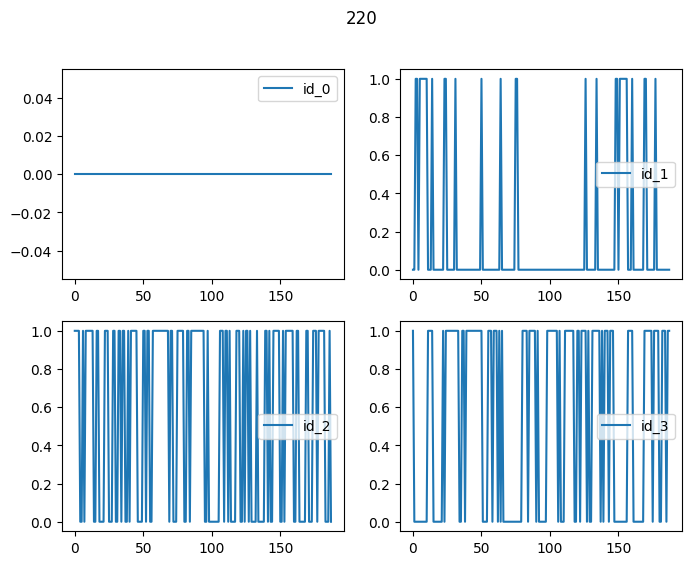

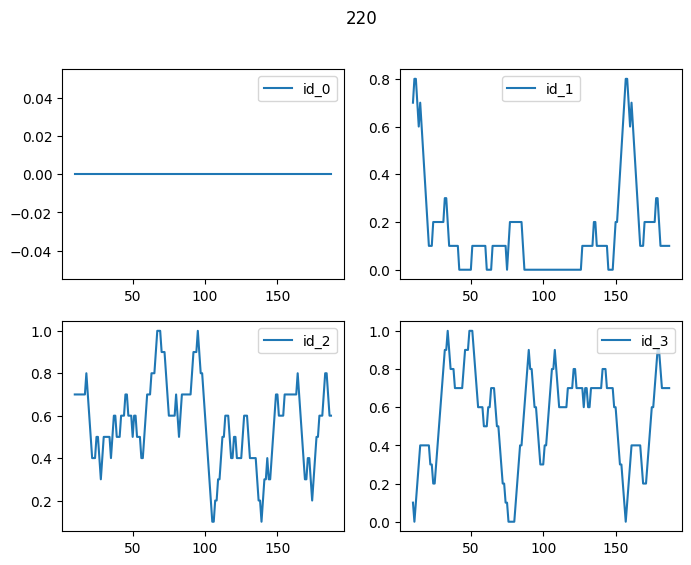

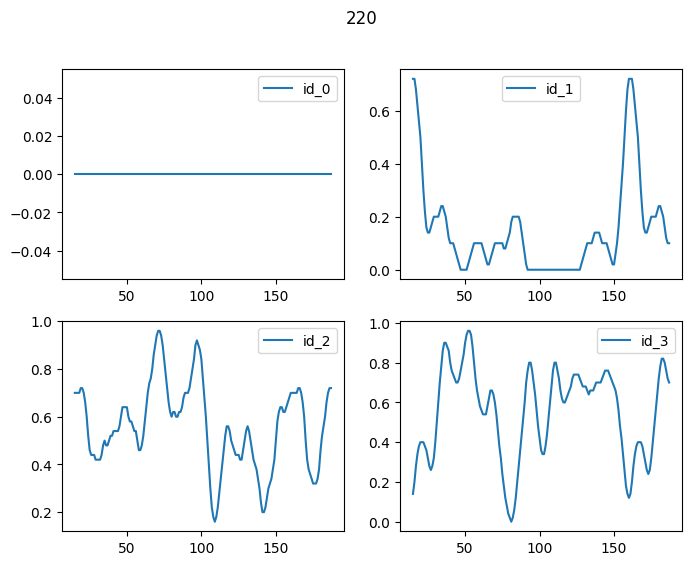

In [34]:
# raw

column = ['id_0', 'id_1', 'id_2', 'id_3']
fig = plt.figure(figsize=(8,6))
fig.suptitle(name)
# 1의 빈도수 계산
# column = columns[2]
for  i in range(len(column)):
    ax = fig.add_subplot(2,2,i+1)
    ax.plot(df[column[i]].index, df[column[i]], label=column[i])

    ax.legend()


plt.show()

column = ['id_0', 'id_1', 'id_2', 'id_3']
fig = plt.figure(figsize=(8,6))
fig.suptitle(name)
window_size = 10
# moving_average = [0]*1440
moving_average_list = []

for i in range(len(column)):
    moving_average = []
    ax = fig.add_subplot(2,2,i+1)
    for j in range(len(df[column[i]])-window_size):
        moving_average.append(sum(df[column[i]][j:j+window_size])/window_size)

    moving_average_list.append(moving_average)
    # ax.set_xlim(0, 10000)

    # ax.scatter(gt[i], moving_average[gt[i]-window_size], c='r', zorder=3)
    ax.plot(df[column[i]].index[window_size:], moving_average, label=column[i], zorder=2)
    
    ax.legend()
    
    
window_size_2 = 5
column = ['id_0', 'id_1', 'id_2', 'id_3']
fig = plt.figure(figsize=(8,6))
fig.suptitle(name)

for i in range(len(column)):
    db_moving_average = []
    ax = fig.add_subplot(2,2,i+1)
    for j in range(len(moving_average_list[i])-window_size_2):
        db_moving_average.append((sum(moving_average_list[i][j:j+window_size_2]))/window_size_2)

    # ax.set_xlim(0, 10000)
    ax.plot(df[column].index[window_size+window_size_2:], db_moving_average, label=column[i], zorder=2)

    # ax.scatter(gt[i], db_moving_average[gt[i]-(window_size+window_size_2)], c='r', zorder=3)

    ax.legend()



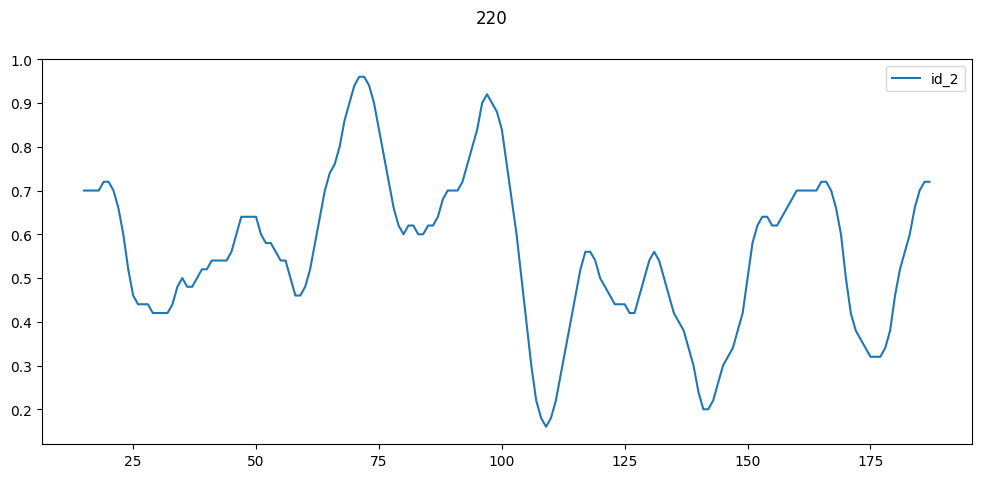

In [35]:
column = ['id_0', 'id_1', 'id_2', 'id_3']
# fig = plt.figure(figsize=(12,5))
# fig.suptitle(name)
window_size = 10
i = 2
moving_average = []
for j in range(len(df[column[i]])-window_size):
    moving_average.append(sum(df[column[i]][j:j+window_size])/window_size)

moving_average_list.append(moving_average)
# ax.set_xlim(0, 10000)

# ax.scatter(gt[i], moving_average[gt[i]-window_size], c='r', zorder=3)
# plt.plot(df[column[i]].index[window_size:], moving_average, label=column[i], zorder=2)

# plt.legend()


window_size_2 = 5
column = ['id_0', 'id_1', 'id_2', 'id_3']
fig = plt.figure(figsize=(12,5))
fig.suptitle(name)


db_moving_average = []
for j in range(len(moving_average_list[i])-window_size_2):
    db_moving_average.append((sum(moving_average_list[i][j:j+window_size_2]))/window_size_2)

# ax.set_xlim(0, 10000)
plt.plot(df[column].index[window_size+window_size_2:], db_moving_average, label=column[i], zorder=2)

# ax.scatter(gt[i], db_moving_average[gt[i]-(window_size+window_size_2)], c='r', zorder=3)

plt.legend()

plt.show()

In [8]:
# raw
fig = plt.figure(figsize=(8,6))
# fig.suptitle(name)
# 1의 빈도수 계산
column = column[2]

ax = fig.add_subplot(1,1,1)
ax.plot(df.index, df['ear_state'])


plt.show()

NameError: name 'columns' is not defined

<Figure size 800x600 with 0 Axes>

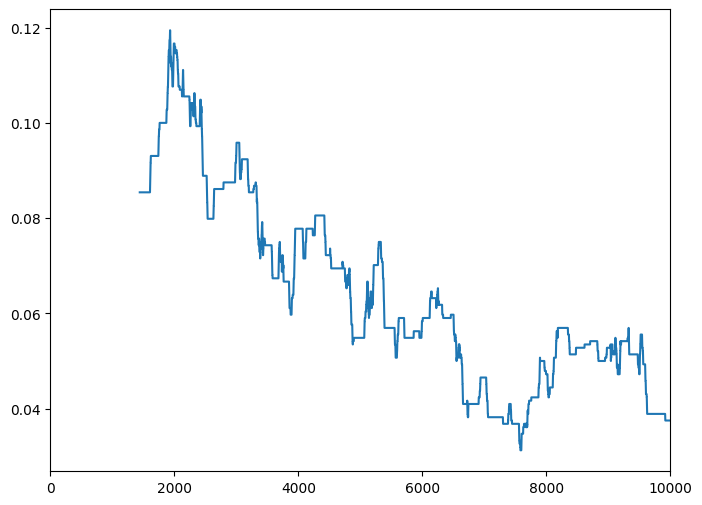

In [7]:
fig = plt.figure(figsize=(8,6))
window_size = 1440
moving_average = []
for i in range(len(df['ear_state'])-window_size):
    moving_average.append(sum(df['ear_state'][i:i+window_size])/window_size)

ax = fig.add_subplot(1,1,1)
ax.set_xlim(0, 10000)
ax.plot(df.index[window_size:], moving_average)

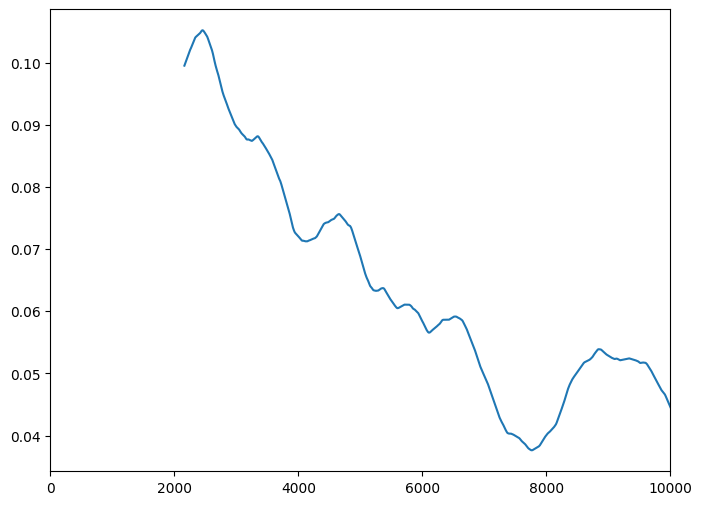

In [8]:
fig = plt.figure(figsize=(8,6))
window_size_2 = 720
db_moving_average = []
for i in range(len(moving_average)-window_size_2):
        db_moving_average.append((sum(moving_average[i:i+window_size_2]))/window_size_2)

ax = fig.add_subplot(1,1,1)
ax.set_xlim(0, 10000)
ax.plot(df.index[window_size+window_size_2:], db_moving_average)

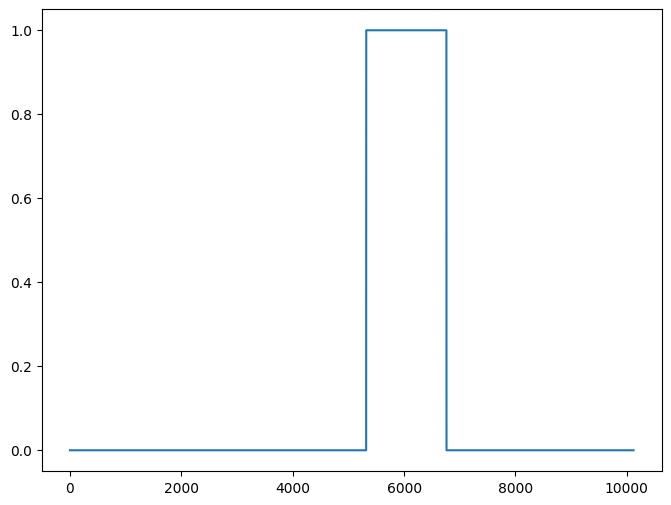

In [11]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1)
ax.plot(df.index, df['label'])